In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import cartopy.crs as ccrs
from scipy.stats import ttest_ind,sem
import pandas as pd
import matplotlib
import climapy.climapy.climapy_stats as clps

In [2]:
dirctl='/dhobyghaut/grandey/data5/cesm/s2s/'
pptcu2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.PRECC.nc')
pptcl2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.PRECL.nc')
# print(pptcu2k)
pptcueas0=xr.open_dataset(dirctl+'p17d_b_eas0c/atm/p17d_b_eas0c.cam.h0.PRECC.nc')
pptcleas0=xr.open_dataset(dirctl+'p17d_b_eas0c/atm/p17d_b_eas0c.cam.h0.PRECL.nc')
ts2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.TS.nc')
tseas0=xr.open_dataset(dirctl+'p17d_b_eas0c/atm/p17d_b_eas0c.cam.h0.TS.nc')

u_2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.U.nc')
v_2k=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.V.nc')
u_eas0=xr.open_dataset(dirctl+'p17d_b_eas0c/atm/p17d_b_eas0c.cam.h0.U.nc')
v_eas0=xr.open_dataset(dirctl+'p17d_b_eas0c/atm/p17d_b_eas0c.cam.h0.V.nc')

# wind=xr.open_dataset(dirctl+'p17d_b_eas0/atm/')
#ppt data is in m/s. convert to mm/day *60*60*24*1000 = *86400000
units=60*60*24*1000
#d01
latmin=2.92
latmax=24.18
lonmin=81.9 #80.66
lonmax=124.17 #125.42
#d02
# latmin=6.74
# latmax=20.40
# lonmin=95.74
# lonmax=110.08
starttime=12*50
#comment out this section below if you want global data
pptcl2k=pptcl2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcu2k=pptcu2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcleas0=pptcleas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
pptcueas0=pptcueas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
u_2k=u_2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
v_2k=v_2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
u_eas0=u_eas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
v_eas0=v_eas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
ts2k=ts2k.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
tseas0=tseas0.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
#comment out section above if you want global data
t,nlat,nlon=np.shape(pptcl2k.PRECL)
lons=pptcl2k.lon
lats=pptcl2k.lat

#cut specific time period
def reshape_time(data):
    time_a=pd.date_range('2000-01', periods=12*5, freq='MS')
    time_b=pd.date_range('2005-01', periods=12*5, freq='MS')
    time_c=pd.date_range('2010-01', periods=12*5, freq='MS')
    s1a = data[starttime:starttime+12*5]
    s1b = data[starttime+12*19:starttime+12*24]
    s1c = data[starttime+12*40:starttime+12*45]
    s1a['time']=time_a
    s1b['time']=time_b
    s1c['time']=time_c
    return xr.concat([s1a,s1b,s1c],dim='time')
# def reshape_time(data):
#     return data[starttime:,:,:]

cesmcl2000 = reshape_time(pptcl2k.PRECL)*units
cesmcu2000 = reshape_time(pptcu2k.PRECC)*units
cesmcleas0c = reshape_time(pptcleas0.PRECL)*units
cesmcueas0c = reshape_time(pptcueas0.PRECC)*units
cesm_u_2000 = reshape_time(u_2k.U)
cesm_v_2000 = reshape_time(v_2k.V)
cesm_u_eas0c = reshape_time(u_eas0.U)
cesm_v_eas0c = reshape_time(v_eas0.V)
cesm_ts_2000 = reshape_time(ts2k.TS)
cesm_ts_eas0c = reshape_time(tseas0.TS)

print(np.shape(cesmcl2000),lons.data,lats.data)
print('domain means',np.mean(cesmcl2000),np.mean(cesmcu2000),np.mean(cesmcleas0c),np.mean(cesmcueas0c))
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolormesh(lons,lats,np.mean(cesmcu2000,axis=0))
# ax=plt.gca()
# ax.coastlines()
# plt.show()


/home/likkhian/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:393: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/likkhian/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


(180, 11, 17) [  82.5   85.    87.5   90.    92.5   95.    97.5  100.   102.5  105.
  107.5  110.   112.5  115.   117.5  120.   122.5] [  4.73684211   6.63157895   8.52631579  10.42105263  12.31578947
  14.21052632  16.10526316  18.          19.89473684  21.78947368
  23.68421053]
domain means <xarray.DataArray 'PRECL' ()>
array(0.5022894329277494) <xarray.DataArray 'PRECC' ()>
array(4.547879075552682) <xarray.DataArray 'PRECL' ()>
array(0.5685664979092271) <xarray.DataArray 'PRECC' ()>
array(4.874899077304753)


new lim  0.0037433155080213902 (180, 11, 17) (180, 11, 17)
new lim  0.0 (180, 11, 17) (180, 11, 17)
new lim  0.0 (180, 11, 17) (180, 11, 17)


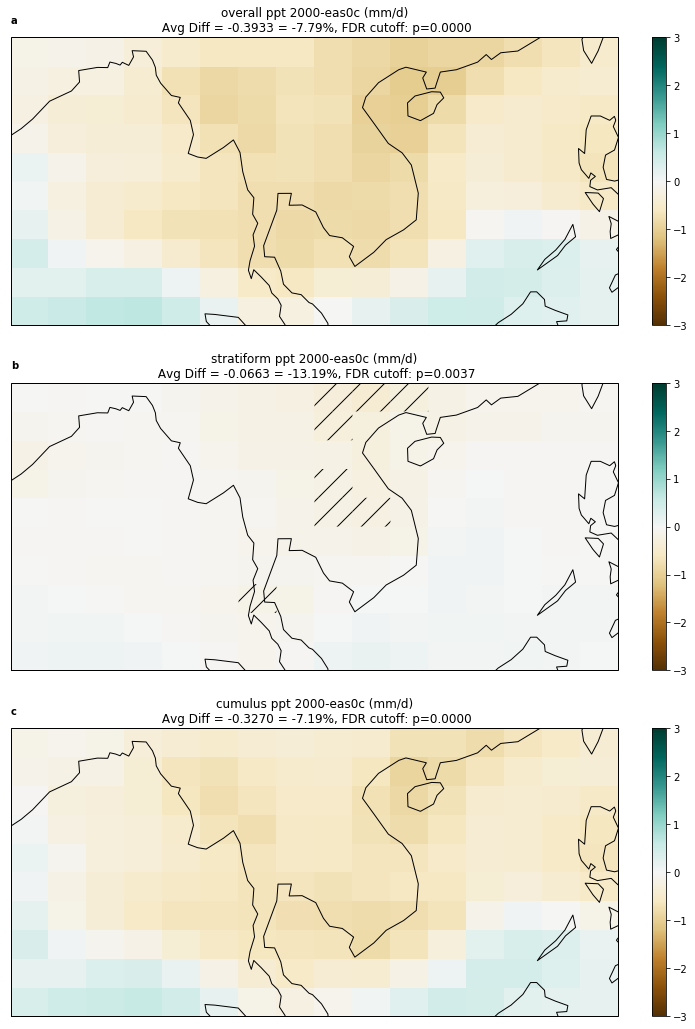

In [3]:
# print(pptcu2k.lat)
# print(pptcueas0.lon)
# print(starttime)
def ave_diff(dd2,dd1):
    pctDiff=(np.mean(dd1)-np.mean(dd2))/np.mean(dd1)*100
    return np.mean(dd1-dd2,axis=0),pctDiff

def sigMask(s2,s1):
    t1,p1 = ttest_ind(s2,s1)
    lim1 = clps.stats_fdr(p1,0.05)
    pp1 = np.ma.masked_greater(p1, lim1)
    print('new lim ',lim1,np.shape(s2),np.shape(s1))
    return pp1,lim1

def plt_diff(data1,data2,title,ax,flip=False):
    vminn=-3.
    vmaxx=3.
    aveDiff,pctDiff=ave_diff(data2,data1)
    if flip:
        cmap = plt.get_cmap('bwr')
    else:
        cmap = plt.get_cmap('BrBG')
    ax.pcolor(pptcl2k.lon,pptcl2k.lat,aveDiff,cmap=cmap,vmin=vminn,vmax=vmaxx)
    # ax.contour(s1raw.lon,s1raw.lat,geo02.HGT_M[0,5:-5,5:-5],levels=[50,100,200,400,800])
    ax.coastlines()
#     ax.add_feature(cfeature.RIVERS)
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=vminn, vmax=vmaxx))
    sm._A = []
    plt.colorbar(sm,ax=ax,fraction=0.025, pad=0.05)
    pp1,lim1=sigMask(data2,data1)
    ax.pcolor(pptcl2k.lon, pptcl2k.lat, pp1, hatch='/', alpha=0.)
    titleLine=title+'\n Avg Diff = '+str('{:.4f}'.format(np.nanmean(aveDiff)))+' = '+str('{:.2f}'.format(float(pctDiff)))+\
    '%, FDR cutoff: p='+str('{:.4f}'.format(float(lim1)))
    ax.set_title(titleLine)


# plt.rcParams["figure.figsize"] = 12,18 #change inline plot size
plt.rcParams["figure.figsize"] = 12,18

plt.figure(1)
title='stratiform ppt 2000-eas0c (mm/d)'
ax1=plt.subplot(3,1,2,projection=ccrs.PlateCarree())
plt_diff(cesmcl2000,cesmcleas0c,title,ax1)
ax1.text(0.0, 1.05, 'b', transform=ax1.transAxes, 
            size=10, weight='bold')

title='cumulus ppt 2000-eas0c (mm/d)'
ax2=plt.subplot(3,1,3,projection=ccrs.PlateCarree())
plt_diff(cesmcu2000,cesmcueas0c,title,ax2)
ax2.text(0.0, 1.05, 'c', transform=ax2.transAxes, 
            size=10, weight='bold')

title='overall ppt 2000-eas0c (mm/d)'
ax3=plt.subplot(3,1,1,projection=ccrs.PlateCarree())
plt_diff(cesmcl2000+cesmcu2000,cesmcleas0c+cesmcueas0c,title,ax3)
ax3.text(0.0, 1.05, 'a', transform=ax3.transAxes, 
            size=10, weight='bold')
plt.show()

In [4]:
# Calculated p-value threshold

t1,p1 = ttest_ind(cesmcueas0c,cesmcu2000)
p1=np.array([np.nan,0.1,0.0001,0.000001,1,1.1,np.nan,5000])
alpha=0.1
p_sorted = np.sort(p1.flatten())  # sort the p-values
n = p_sorted.size  # number of p-values
print(n)
p_fdr = 0.0  # initialise p-value threshold - to be updated
for i in range(1, n+1):  # loop over p-values
    p_temp = p_sorted[i-1]  # next p-value to check
    print(p_temp,i*1./n*alpha)
    if p_temp <= (i * 1. / n) * alpha:
        p_fdr = (i * 1. / n) * alpha  # update p-value threshold
    else:
        break
print(p_sorted)

8
1e-06 0.0125
0.0001 0.025
0.1 0.037500000000000006
[  1.00000000e-06   1.00000000e-04   1.00000000e-01   1.00000000e+00
   1.10000000e+00   5.00000000e+03              nan              nan]


In [5]:
# cesmcl2000
# cesmcu2000
# cesmcleas0c
np.shape(cesmcueas0c)

#resampling wind and ppt to quarterly
def qtr_sam(data):
    time,lat,lon=np.shape(data)
    myperm=list(range(2,180))
    myperm.append(0)
    myperm.append(1) #move the first jan and feb next to the last dec
    qtr_raw=np.reshape(data.data[myperm,:,:],(-1,3,lat,lon)) #3 months in each quarter!
    return qtr_raw #returns monthly data grouped into quarters

def agg_qtr(data):
    qtr_raw=np.mean(qtr_sam(data),axis=1)
    ti,lat,lon=np.shape(data)
    qtr_shaped=np.reshape(qtr_raw.data,(-1,4,lat,lon))
    return qtr_shaped

def new_msk(s1,s2):
    t1,p1 = ttest_ind(s2,s1)
    lim1 = clps.stats_fdr(p1,0.05)
    print(lim1)
    pp1 = np.ma.masked_greater(p1, lim1)
    return pp1

0.0
0.0
0.011229946524064172
0.0


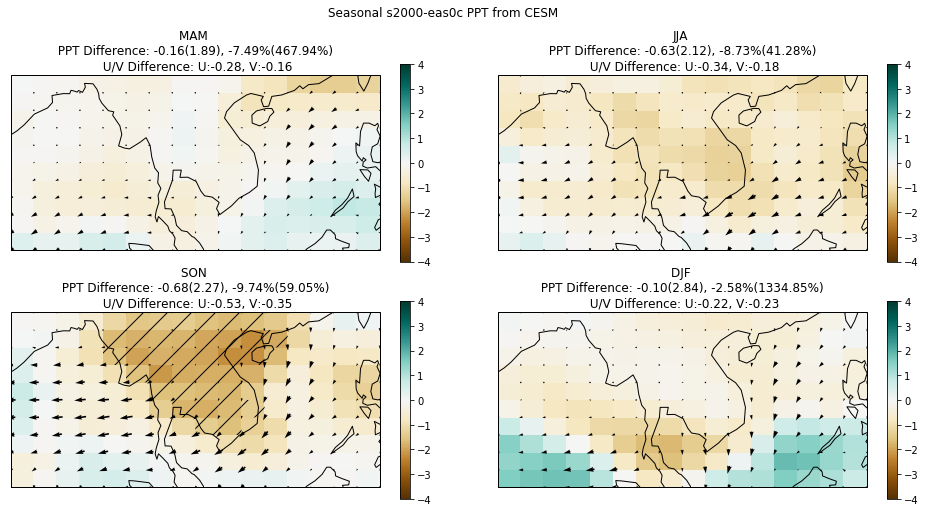

In [6]:
s1_qtr=agg_qtr(cesmcu2000+cesmcl2000)
s2_qtr=agg_qtr(cesmcueas0c+cesmcleas0c)
s1_u_qtr=agg_qtr(cesm_u_2000[:,-1,:,:])
s1_v_qtr=agg_qtr(cesm_v_2000[:,-1,:,:])
s2_u_qtr=agg_qtr(cesm_u_eas0c[:,-1,:,:])
s2_v_qtr=agg_qtr(cesm_v_eas0c[:,-1,:,:])
pptdiff=s1_qtr-s2_qtr
udiff=np.mean(s1_u_qtr[:,:,::1,::1],axis=0)-np.mean(s2_u_qtr[:,:,::1,::1],axis=0)
vdiff=np.mean(s1_v_qtr[:,:,::1,::1],axis=0)-np.mean(s2_v_qtr[:,:,::1,::1],axis=0)

quarters={1:'MAM',2:'JJA',3:'SON',4:'DJF'}

plt.rcParams["figure.figsize"] = 16,8    
slon1 = pptcl2k.lon[0::1]
slat1 = pptcl2k.lat[0::1]
cmap = plt.get_cmap('BrBG')
vminn=-4
vmaxx=4
scale=50
sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=vminn, vmax=vmaxx))
sm._A = []
def draw_title(tt):
    return str('{} \n PPT Difference: {:.2f}({:.2f}), {:.2f}%({:.2f}%) \n U/V Difference: U:{:.2f}, V:{:.2f}'.format(quarters[tt+1],np.nanmean(pptdiff[:,tt,:,:]),\
            np.std(pptdiff[:,tt,:,:]), (np.nanmean(pptdiff[:,tt,:,:])/np.nanmean(s1_qtr[:,tt,:,:])*100),np.std(pptdiff[:,tt,:,:]/s1_qtr[:,tt,:,:]*100), \
            float(np.mean(udiff[tt,:,:])),float(np.mean(vdiff[tt,:,:])) ))
def draw_qtr_plt(ax,tt):
    ax.pcolormesh(pptcl2k.lon, pptcl2k.lat,np.mean(pptdiff[:,tt,:,:],axis=0),vmin=vminn,vmax=vmaxx,cmap=cmap)
    ax.pcolor(pptcl2k.lon, pptcl2k.lat, new_msk(s1_qtr[:,tt,:,:],s2_qtr[:,tt,:,:]), hatch='/', alpha=0.)
    ax.quiver(slon1,slat1,udiff[tt,:,:],vdiff[tt,:,:],pivot='middle',scale=scale)
    ax.coastlines()
    plt.colorbar(sm,ax=ax,fraction=0.04, pad=0.05)
    ax.set_title(draw_title(tt))
    

ax1=plt.subplot(2,2,1,projection=ccrs.PlateCarree())
draw_qtr_plt(ax1,0)
ax2=plt.subplot(2,2,2,projection=ccrs.PlateCarree())
draw_qtr_plt(ax2,1)
ax3=plt.subplot(2,2,3,projection=ccrs.PlateCarree())
draw_qtr_plt(ax3,2)
ax4=plt.subplot(2,2,4,projection=ccrs.PlateCarree())
draw_qtr_plt(ax4,3)
plt.suptitle('Seasonal s2000-eas0c PPT from CESM')
plt.show()

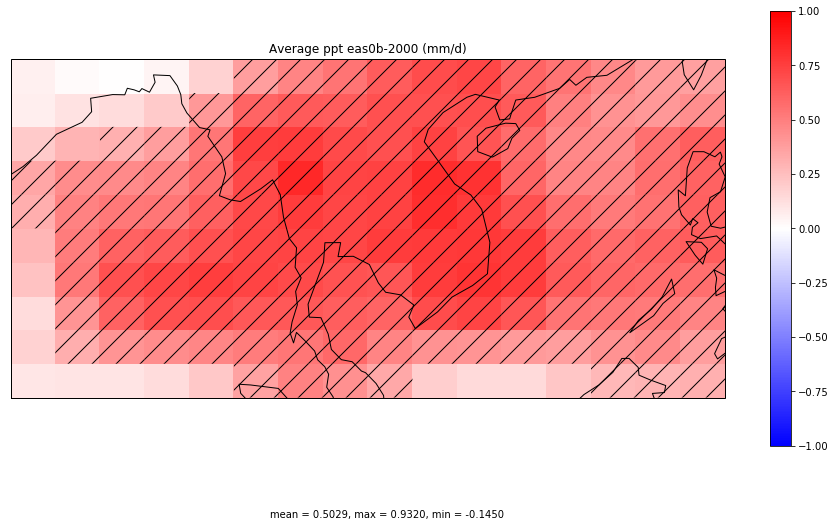

In [7]:
#seasonal outputs. 0=jan ... 11=dec

pptcl2ka=pptcl2k.PRECL.data.reshape((-1,12,nlat,nlon))
pptcl2kb=pptcl2ka[:,:,:,:].reshape((-1,nlat,nlon))
pptcu2ka=pptcu2k.PRECC.data.reshape((-1,12,nlat,nlon))
pptcu2kb=pptcu2ka[:,:,:,:].reshape((-1,nlat,nlon))
pptcleas0a=pptcleas0.PRECL.data.reshape((-1,12,nlat,nlon))
pptcleas0b=pptcleas0a[:,:,:,:].reshape((-1,nlat,nlon))
pptcueas0a=pptcueas0.PRECC.data.reshape((-1,12,nlat,nlon))
pptcueas0b=pptcueas0a[:,:,:,:].reshape((-1,nlat,nlon))

#ignore transient period 3*40yrs
starttime=120

t1,p1 = ttest_ind(pptcleas0b[starttime:,:,:],pptcl2kb[starttime:,:,:])
pp1 = np.ma.masked_greater(p1, 0.1)
t2,p2 = ttest_ind(pptcueas0b[starttime:,:,:],pptcu2kb[starttime:,:,:])
pp2 = np.ma.masked_greater(p2, 0.1)
t3,p3 = ttest_ind(pptcleas0b[starttime:,:,:]+pptcueas0b[starttime:,:,:],pptcl2kb[starttime:,:,:]+pptcu2kb[starttime:,:,:])
pp3 = np.ma.masked_greater(p3, 0.1)

# plt.rcParams["figure.figsize"] = 10,6 #change inline plot size
# plt.figure(1)
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolor(lons, lats,np.mean(pptcleas0b[starttime:,:,:]-pptcl2kb[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
# ax=plt.gca()
# ax.set_title('stratiform ppt eas0-2000 (mm/d)')
# ax.coastlines()
# plt.colorbar()
# plt.pcolor(lons, lats, pp1, hatch='/', alpha=0.)

# plt.figure(2)
# plt.subplot(projection=ccrs.PlateCarree())
# plt.pcolor(lons, lats,np.mean(pptcueas0b[starttime:,:,:]-pptcu2kb[starttime:,:,:],axis=0)*units,cmap='bwr',vmax=0.5,vmin=-0.5)
# ax=plt.gca()
# ax.set_title('cumulus ppt eas0-2000 (mm/d)')
# ax.coastlines()
# plt.colorbar()
# plt.pcolor(lons, lats, pp2, hatch='/', alpha=0.)

netdiff=pptcleas0b[starttime:,:,:]+pptcueas0b[starttime:,:,:]-pptcl2kb[starttime:,:,:]-pptcu2kb[starttime:,:,:]
plt.figure(3)
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(lons, lats,np.mean(netdiff,axis=0)*units,cmap='bwr',vmax=1,vmin=-1)
ax=plt.gca()
ax.set_title('Average ppt eas0b-2000 (mm/d)')
ax.coastlines()
plt.colorbar()
plt.pcolor(lons, lats, pp3, hatch='/', alpha=0.)
plt.figtext(0.35,0,'mean = {:.4f}, max = {:.4f}, min = {:.4f}'.format(units*np.mean(netdiff),\
                                                     units*np.max(np.mean(netdiff,axis=0)),\
                                                     units*np.min(np.mean(netdiff,axis=0))))
plt.show()

# Comparison with wrf downscalling

(61, 11, 17)
qtr = 1
CESM mean=144009297.3014,var=23153084872732400.0000. WRF27km mean=2.7108,var=20.0393. WRF9km mean=0.9552,var=2.4474


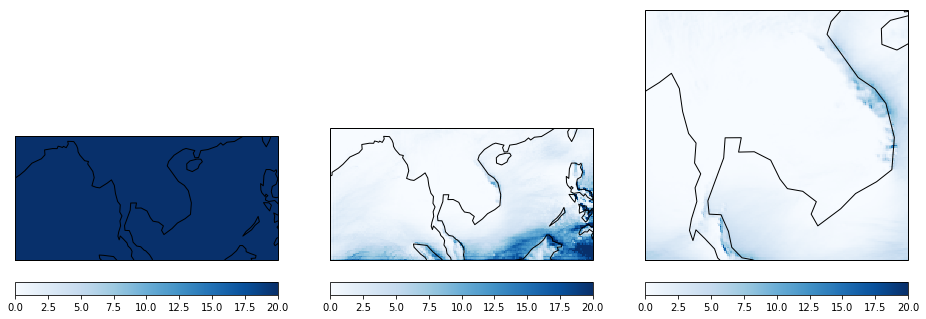

qtr = 2
CESM mean=85877823.3204,var=5512281580898275.0000. WRF27km mean=1.1645,var=3.1823. WRF9km mean=0.8311,var=0.3324


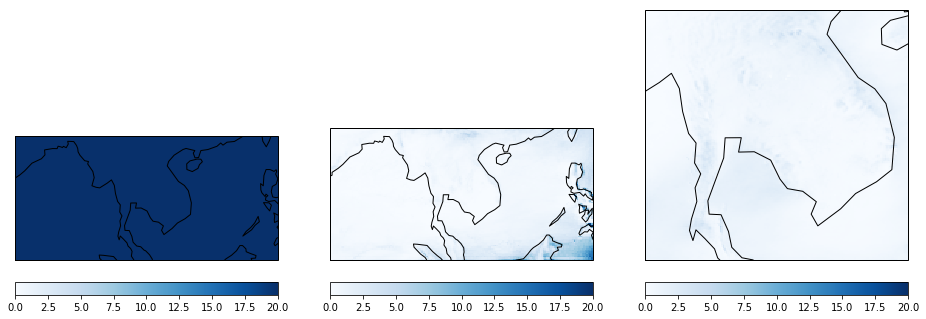

qtr = 3
CESM mean=391925640.8488,var=22424498003272368.0000. WRF27km mean=7.8055,var=16.1789. WRF9km mean=7.5493,var=19.7011


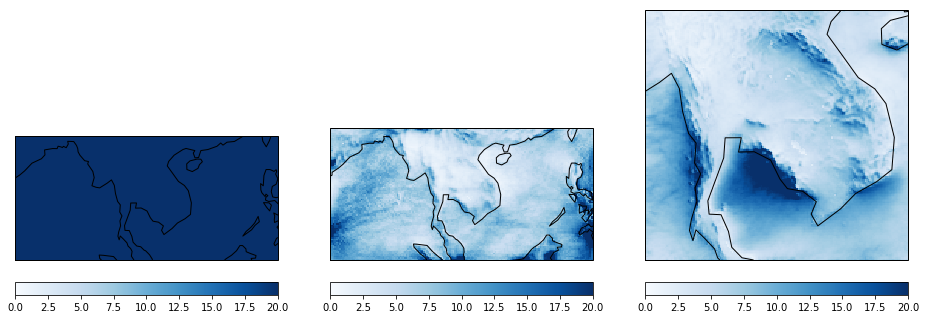

qtr = 4
CESM mean=676524204.8388,var=35234769163261184.0000. WRF27km mean=13.1391,var=25.4486. WRF9km mean=13.9778,var=49.0028


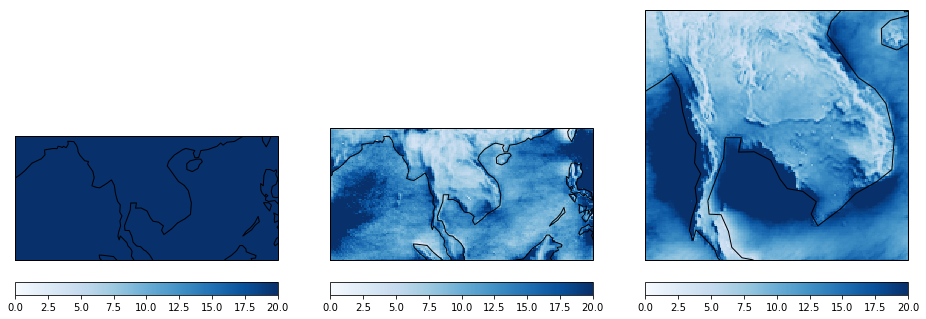

In [9]:
plt.rcParams["figure.figsize"] = 16,8
wrfout=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run2d_2000_d01.nc')
wrfout2=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run2d_2000_d02.nc')
wrfppt=wrfout.PPT.resample('3M',dim='time',how='mean')
wrfppt2=wrfout2.PPT.resample('3M',dim='time',how='mean')
cesmpptout=cesmcu2000+cesmcl2000
# timess=pd.period_range('0090-01-01', '0094-12-01', freq='M').to_timestamp()
# cesmpptoutput = xr.DataArray(cesmpptout, coords=[timess, cesmpptout.coords['lat'],cesmpptout.coords['lon']], dims=['time', 'lat','lon'])
cesmppt=cesmpptout.resample('3M',dim='time',how='mean')
print(np.shape(cesmppt))
for tt in range(0,4):
    print('qtr = '+str(tt+1))
    plt.figure(tt)
    ax1=plt.subplot(1,3,1,projection=ccrs.PlateCarree())
    ax1.pcolor(lons, lats,cesmppt[tt,:,:]*units,vmin=0,vmax=20,cmap='Blues')
    ax1.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax1,fraction=0.04, pad=0.05, orientation='horizontal')
    ax2=plt.subplot(1,3,2,projection=ccrs.PlateCarree())
    ax2.pcolor(wrfout.lon,wrfout.lat,wrfppt[tt,:,:],vmin=0,vmax=20,cmap='Blues')
    ax2.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax2,fraction=0.04, pad=0.05, orientation='horizontal')
    ax3=plt.subplot(1,3,3,projection=ccrs.PlateCarree())
    ax3.pcolor(wrfout2.lon,wrfout2.lat,wrfppt2[tt,:,:],vmin=0,vmax=20,cmap='Blues')
    ax3.coastlines()
    cmap = plt.get_cmap('Blues')
    sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=0, vmax=20))
    sm._A = []
    plt.colorbar(sm,ax=ax3,fraction=0.04, pad=0.05, orientation='horizontal')
    print('CESM mean={:.4f},var={:.4f}. WRF27km mean={:.4f},var={:.4f}. WRF9km mean={:.4f},var={:.4f}'.format \
          (float(np.mean(cesmppt[tt,:,:]*units)),float(np.var(cesmppt[tt,:,:]*units)),float(np.mean(wrfppt[tt,:,:])), \
           float(np.var(wrfppt[tt,:,:])),float(np.mean(wrfppt2[tt,:,:])),float(np.var(wrfppt2[tt,:,:]))))
    plt.show()

In [10]:
print(wrfout.lat[0].data,wrfout.lat[-1].data,wrfout.lon[0].data,wrfout.lon[-1].data)
print(wrfout2.lat[0].data,wrfout2.lat[-1].data,wrfout2.lon[0].data,wrfout2.lon[-1].data)

2.919708251953125 24.17534637451172 81.90802001953125 124.16838073730469
6.739631652832031 20.397010803222656 95.7447509765625 110.08158874511719


In [11]:

print(cesmpptout)
timess=pd.period_range('0090-01-01', '0094-12-01', freq='M')
timess=timess.to_timestamp()
# print(timess)
cesmpptoutput = xr.DataArray(cesmpptout, coords=[timess, cesmpptout.coords['lat'],cesmpptout.coords['lon']], dims=['time', 'lat','lon'])
print(cesmpptoutput)


<xarray.DataArray (time: 180, lat: 11, lon: 17)>
array([[[  7.633088e+00,   6.500290e+00, ...,   3.360081e+00,   2.684008e+00],
        [  5.053332e+00,   4.142950e+00, ...,   1.381676e+00,   8.730691e-01],
        ..., 
        [  8.627377e-02,   5.087607e-02, ...,   2.663570e+00,   2.432939e+00],
        [  8.539302e-02,   8.341551e-02, ...,   2.436276e+00,   2.629373e+00]],

       [[  8.192025e-01,   8.279251e-01, ...,   1.422147e+00,   1.168561e+00],
        [  8.420584e-01,   7.331484e-01, ...,   9.029093e-01,   6.092356e-01],
        ..., 
        [  1.056557e-01,   4.395844e-01, ...,   2.144359e+00,   2.447686e+00],
        [  1.474642e-01,   3.262104e-01, ...,   2.787088e+00,   3.350698e+00]],

       ..., 
       [[  1.087829e+01,   8.518675e+00, ...,   5.082941e+00,   4.961906e+00],
        [  1.215669e+01,   9.799835e+00, ...,   5.051930e+00,   4.685886e+00],
        ..., 
        [  1.107059e-01,   4.435391e-01, ...,   1.217566e+00,   3.248360e+00],
        [  4.597326e-03

ValueError: conflicting sizes for dimension 'time': length 180 on the data but length 60 on coordinate 'time'

In [12]:
ts2000a=xr.open_dataset(dirctl+'p17d_b_2000/atm/p17d_b_2000.cam.h0.TS.nc')
# print(pptcu2k)
tseas0ca=xr.open_dataset(dirctl+'p17d_b_eas0b/atm/p17d_b_eas0b.cam.h0.TS.nc')
ts2000=ts2000a.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
tseas0c=tseas0ca.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))

/home/likkhian/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:393: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  result = decode_cf_datetime(example_value, units, calendar)
/home/likkhian/anaconda3/lib/python3.6/site-packages/xarray/conventions.py:412: RuntimeWarning: Unable to decode time axis into full numpy.datetime64 objects, continuing using dummy netCDF4.datetime objects instead, reason: dates out of range
  calendar=self.calendar)


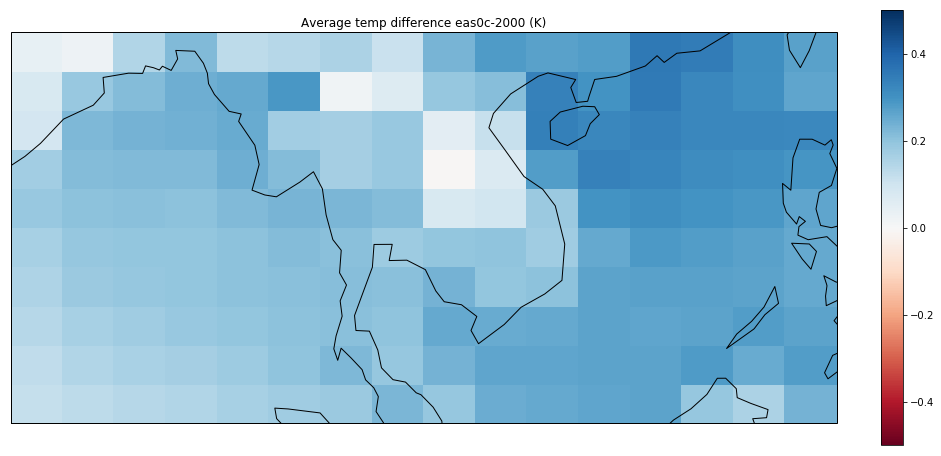

<xarray.DataArray 'TS' ()>
array(0.26043701171875)


In [13]:
tsdiff=np.mean(tseas0c.TS,axis=0)-np.mean(ts2000.TS,axis=0)
tslons=tseas0c.lon
tslats=tseas0c.lat
plt.subplot(projection=ccrs.PlateCarree())
plt.pcolor(tslons, tslats,tsdiff,cmap='RdBu',vmax=0.5,vmin=-0.5)
ax=plt.gca()
ax.set_title('Average temp difference eas0c-2000 (K)')
ax.coastlines()
cmap = plt.get_cmap('RdBu')
sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=-0.5, vmax=0.5))
sm._A = []
plt.colorbar(sm,ax=ax,fraction=0.025, pad=0.05)
plt.show()
print(np.mean(tseas0c.TS)-np.mean(ts2000.TS))

In [14]:
np.set_printoptions(threshold=np.inf)
# a = np.asarray([i for i in range(24) for _ in range(0)]).reshape((24, 3, 3))
# print(a)
# aa = a.reshape((-1,3,4,3,3))
# print(aa[:,:,2,:,:].reshape((-1,3,3)))
a=np.asarray([i for i in range(24) for _ in range(9)])
aa=a.reshape((24,3,3))
print(aa)
aaa=aa.reshape((-1,12,3,3))
print(np.shape(aaa))
print(aaa[:,5:8,:,:].reshape((-1,3,3)))

[[[ 0  0  0]
  [ 0  0  0]
  [ 0  0  0]]

 [[ 1  1  1]
  [ 1  1  1]
  [ 1  1  1]]

 [[ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]]

 [[ 3  3  3]
  [ 3  3  3]
  [ 3  3  3]]

 [[ 4  4  4]
  [ 4  4  4]
  [ 4  4  4]]

 [[ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]]

 [[ 6  6  6]
  [ 6  6  6]
  [ 6  6  6]]

 [[ 7  7  7]
  [ 7  7  7]
  [ 7  7  7]]

 [[ 8  8  8]
  [ 8  8  8]
  [ 8  8  8]]

 [[ 9  9  9]
  [ 9  9  9]
  [ 9  9  9]]

 [[10 10 10]
  [10 10 10]
  [10 10 10]]

 [[11 11 11]
  [11 11 11]
  [11 11 11]]

 [[12 12 12]
  [12 12 12]
  [12 12 12]]

 [[13 13 13]
  [13 13 13]
  [13 13 13]]

 [[14 14 14]
  [14 14 14]
  [14 14 14]]

 [[15 15 15]
  [15 15 15]
  [15 15 15]]

 [[16 16 16]
  [16 16 16]
  [16 16 16]]

 [[17 17 17]
  [17 17 17]
  [17 17 17]]

 [[18 18 18]
  [18 18 18]
  [18 18 18]]

 [[19 19 19]
  [19 19 19]
  [19 19 19]]

 [[20 20 20]
  [20 20 20]
  [20 20 20]]

 [[21 21 21]
  [21 21 21]
  [21 21 21]]

 [[22 22 22]
  [22 22 22]
  [22 22 22]]

 [[23 23 23]
  [23 23 23]
  [23 23 23]]]
(2, 12, 3, 3)
[[

In [15]:
pptcu2k
def extract_years(ppt):
    extract=np.empty([12*15,11,17])
    extract[:12*5]=ppt[12*50:12*55]
    extract[12*5:12*10]=ppt[12*69:12*74]
    extract[12*10:]=ppt[12*90:12*95]
    return extract
pptcu2k15=extract_years(pptcu2k.PRECC)
pptcl2k15=extract_years(pptcl2k.PRECL)
pptcueas015=extract_years(pptcueas0.PRECC)
pptcleas015=extract_years(pptcleas0.PRECL)
print(np.shape(pptcu2k.PRECC))

(1200, 11, 17)


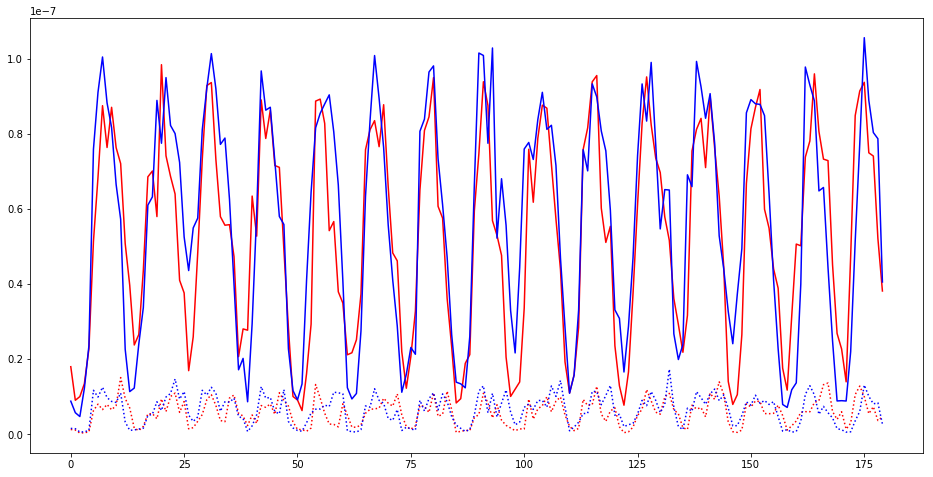

In [16]:
plt.plot(np.mean(pptcu2k15,axis=(1,2)),'r-')
plt.plot(np.mean(pptcl2k15,axis=(1,2)),'r:')
plt.plot(np.mean(pptcueas015,axis=(1,2)),'b-')
plt.plot(np.mean(pptcleas015,axis=(1,2)),'b:')
plt.show()

In [17]:
#extract and condition wrfdata
s1a_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_01_d01.nc')
s1b_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_02_d01.nc')
s1c_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_03_d01.nc')
s2a_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_01_d01.nc')
s2b_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_02_d01.nc')
s2c_d01=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_03_d01.nc')
time_a=pd.date_range('2000-01-01', periods=1825)
time_b=pd.date_range('2005-01-01', periods=1825)
time_c=pd.date_range('2010-01-01', periods=1825)
s1a_d01['time']=time_a
s1b_d01['time']=time_b
s1c_d01['time']=time_c
s2a_d01['time']=time_a
s2b_d01['time']=time_b
s2c_d01['time']=time_c
s1raw_d01=xr.concat([s1a_d01,s1b_d01,s1c_d01],dim='time')
s2raw_d01=xr.concat([s2a_d01,s2b_d01,s2c_d01],dim='time')
#slice to d02 domain. comment to use whole domain
#latmin and latmax from 1st segment defining cesm domain
# s1raw_d01=s1raw_d01.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
# s2raw_d01=s2raw_d01.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))


s1a_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_01_d02.nc')
s1b_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_02_d02.nc')
s1c_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_2000_03_d02.nc')
s2a_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_01_d02.nc')
s2b_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_02_d02.nc')
s2c_d02=xr.open_dataset('../cesm_output_convert/analysis/downscale_results/wrfpost_run_eas0c_03_d02.nc')
s1a_d02['time']=time_a
s1b_d02['time']=time_b
s1c_d02['time']=time_c
s2a_d02['time']=time_a
s2b_d02['time']=time_b
s2c_d02['time']=time_c
s1raw_d02=xr.concat([s1a_d02,s1b_d02,s1c_d02],dim='time')
s2raw_d02=xr.concat([s2a_d02,s2b_d02,s2c_d02],dim='time')

#resample wrf data to monthly
s1_mth_d01_cl=s1raw_d01.RAINNC.resample('1M',dim='time',how='mean')
s1_mth_d01_cu=s1raw_d01.PPT.resample('1M',dim='time',how='mean')-s1_mth_d01_cl
s1_mth_d01_ppt=s1raw_d01.PPT.resample('1M',dim='time',how='mean')
s2_mth_d01_cl=s2raw_d01.RAINNC.resample('1M',dim='time',how='mean')
s2_mth_d01_cu=s2raw_d01.PPT.resample('1M',dim='time',how='mean')-s2_mth_d01_cl
s2_mth_d01_ppt=s2raw_d01.PPT.resample('1M',dim='time',how='mean')

s1_mth_d02_cl=s1raw_d02.RAINNC.resample('1M',dim='time',how='mean')
s1_mth_d02_cu=s1raw_d02.PPT.resample('1M',dim='time',how='mean')-s1_mth_d02_cl
s1_mth_d02_ppt=s1raw_d02.PPT.resample('1M',dim='time',how='mean')
s2_mth_d02_cl=s2raw_d02.RAINNC.resample('1M',dim='time',how='mean')
s2_mth_d02_cu=s2raw_d02.PPT.resample('1M',dim='time',how='mean')-s2_mth_d02_cl
s2_mth_d02_ppt=s2raw_d02.PPT.resample('1M',dim='time',how='mean')

s1_ann_d01_cl=s1_mth_d01_cl.groupby('time.month').mean()
s1_ann_d01_cu=s1_mth_d01_cu.groupby('time.month').mean()
s2_ann_d01_cl=s2_mth_d01_cl.groupby('time.month').mean()
s2_ann_d01_cu=s2_mth_d01_cu.groupby('time.month').mean()

s1_ann_d02_cl=s1_mth_d02_cl.groupby('time.month').mean()
s1_ann_d02_cu=s1_mth_d02_cu.groupby('time.month').mean()
s2_ann_d02_cl=s2_mth_d02_cl.groupby('time.month').mean()
s2_ann_d02_cu=s2_mth_d02_cu.groupby('time.month').mean()

def calculate_sem_d01(ppt_data):
    leng,lat,lon=np.shape(ppt_data)
    return sem(np.mean(np.reshape(ppt_data.data,(-1,12,lat,lon)),axis=(2,3)),axis=0)
def calculate_sem_d02(ppt_data):
    return sem(np.mean(np.reshape(ppt_data.data,(-1,12,170,173)),axis=(2,3)),axis=0)
s1_ann_d01_cu_sd=calculate_sem_d01(s1_mth_d01_cu)
s1_ann_d01_cl_sd=calculate_sem_d01(s1_mth_d01_cl)
s2_ann_d01_cu_sd=calculate_sem_d01(s2_mth_d01_cu)
s2_ann_d01_cl_sd=calculate_sem_d01(s2_mth_d01_cl)

s1_ann_d02_cu_sd=calculate_sem_d02(s1_mth_d02_cu)
s1_ann_d02_cl_sd=calculate_sem_d02(s1_mth_d02_cl)
s2_ann_d02_cu_sd=calculate_sem_d02(s2_mth_d02_cu)
s2_ann_d02_cl_sd=calculate_sem_d02(s2_mth_d02_cl)


d01 (15, 89, 170)
<xarray.DataArray ()>
array(10.909528010902932) 0.61823863201
<xarray.DataArray ()>
array(11.499413915203018) 0.586206623869
<xarray.DataArray 'RAINNC' ()>
array(2.0318375407633487) 0.176430001046
<xarray.DataArray 'RAINNC' ()>
array(2.1563234566169536) 0.177263235805
<xarray.DataArray 'PPT' ()>
array(12.941365551666623) 0.78828991512
<xarray.DataArray 'PPT' ()>
array(13.655737371819592) 0.756923873787
d02 (15, 170, 173)
<xarray.DataArray ()>
array(7.486779888236349) 0.252409127356
<xarray.DataArray ()>
array(8.251305066274842) 0.297349623692
<xarray.DataArray 'RAINNC' ()>
array(1.9680898483700302) 0.175196729876
<xarray.DataArray 'RAINNC' ()>
array(2.2264640804229137) 0.188729753402
<xarray.DataArray 'PPT' ()>
array(9.4548697366063) 0.395024483926
<xarray.DataArray 'PPT' ()>
array(10.477769146697511) 0.460077381565


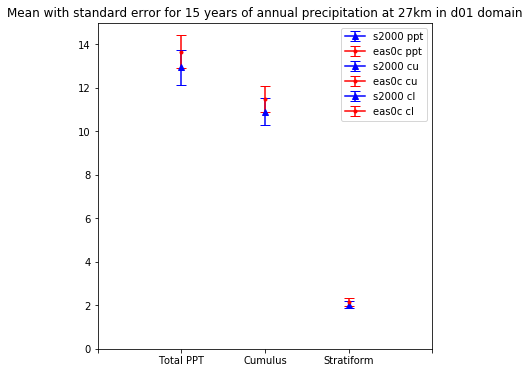

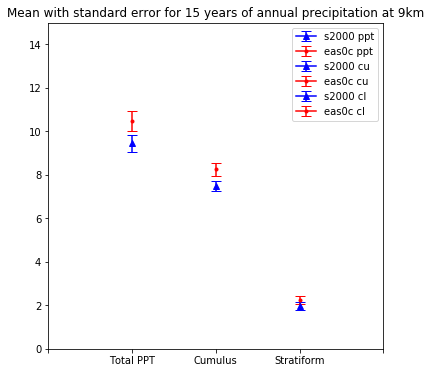

In [18]:
#Resample wrf data to yearly
landmsk=s1raw_d01['LANDMASK'].data
landmsk[landmsk==0]=np.nan
landmsk2=s1raw_d02['LANDMASK'].data
landmsk2[landmsk2==0]=np.nan
landmsk=1
landmsk2=1

s1_yr_d01_cl=(s1raw_d01.RAINNC*landmsk).resample('AS',dim='time',how='mean')
s1_yr_d01_cu=(s1raw_d01.PPT*landmsk).resample('AS',dim='time',how='mean')-s1_yr_d01_cl
s1_yr_d01_ppt=(s1raw_d01.PPT*landmsk).resample('AS',dim='time',how='mean')
s2_yr_d01_cl=(s2raw_d01.RAINNC*landmsk).resample('AS',dim='time',how='mean')
s2_yr_d01_cu=(s2raw_d01.PPT*landmsk).resample('AS',dim='time',how='mean')-s2_yr_d01_cl
s2_yr_d01_ppt=(s2raw_d01.PPT*landmsk).resample('AS',dim='time',how='mean')

s1_yr_d02_cl=(s1raw_d02.RAINNC*landmsk2).resample('AS',dim='time',how='mean')
s1_yr_d02_cu=(s1raw_d02.PPT*landmsk2).resample('AS',dim='time',how='mean')-s1_yr_d02_cl
s1_yr_d02_ppt=(s1raw_d02.PPT*landmsk2).resample('AS',dim='time',how='mean')
s2_yr_d02_cl=(s2raw_d02.RAINNC*landmsk2).resample('AS',dim='time',how='mean')
s2_yr_d02_cu=(s2raw_d02.PPT*landmsk2).resample('AS',dim='time',how='mean')-s2_yr_d02_cl
s2_yr_d02_ppt=(s2raw_d02.PPT*landmsk2).resample('AS',dim='time',how='mean')

# s1_yr_cesm_cl=cesmcl2000.resample('AS',dim='time',how='mean')
# s1_yr_cesm_cu=cesmcu2000.resample('AS',dim='time',how='mean')
# s1_yr_cesm_ppt=s1_yr_cesm_cl+s1_yr_cesm_cu
# s2_yr_cesm_cl=cesmcleas0c.resample('AS',dim='time',how='mean')
# s2_yr_cesm_cu=cesmcueas0c.resample('AS',dim='time',how='mean')
# s2_yr_cesm_ppt=s2_yr_cesm_cl+s2_yr_cesm_cu

np.shape(s1_yr_d01_cu)
print('d01',np.shape(s1_yr_d01_cu))
print(np.mean(s1_yr_d01_cu),sem(np.mean(s1_yr_d01_cu,axis=(1,2))))
print(np.mean(s2_yr_d01_cu),sem(np.mean(s2_yr_d01_cu,axis=(1,2))))
print(np.mean(s1_yr_d01_cl),sem(np.mean(s1_yr_d01_cl,axis=(1,2))))
print(np.mean(s2_yr_d01_cl),sem(np.mean(s2_yr_d01_cl,axis=(1,2))))
print(np.mean(s1_yr_d01_ppt),sem(np.mean(s1_yr_d01_ppt,axis=(1,2))))
print(np.mean(s2_yr_d01_ppt),sem(np.mean(s2_yr_d01_ppt,axis=(1,2))))
print('d02',np.shape(s1_yr_d02_cu))
print(np.mean(s1_yr_d02_cu),sem(np.mean(s1_yr_d02_cu,axis=(1,2))))
print(np.mean(s2_yr_d02_cu),sem(np.mean(s2_yr_d02_cu,axis=(1,2))))
print(np.mean(s1_yr_d02_cl),sem(np.mean(s1_yr_d02_cl,axis=(1,2))))
print(np.mean(s2_yr_d02_cl),sem(np.mean(s2_yr_d02_cl,axis=(1,2))))
print(np.mean(s1_yr_d02_ppt),sem(np.mean(s1_yr_d02_ppt,axis=(1,2))))
print(np.mean(s2_yr_d02_ppt),sem(np.mean(s2_yr_d02_ppt,axis=(1,2))))
# print('cesm',np.shape(s1_yr_cesm_cu))
# print(np.mean(s1_yr_cesm_cu),sem(np.mean(s1_yr_cesm_cu,axis=(1,2))))
# print(np.mean(s2_yr_cesm_cu),sem(np.mean(s2_yr_cesm_cu,axis=(1,2))))
# print(np.mean(s1_yr_cesm_cl),sem(np.mean(s1_yr_cesm_cl,axis=(1,2))))
# print(np.mean(s2_yr_cesm_cl),sem(np.mean(s2_yr_cesm_cl,axis=(1,2))))
# print(np.mean(s1_yr_cesm_ppt),sem(np.mean(s1_yr_cesm_ppt,axis=(1,2))))
# print(np.mean(s2_yr_cesm_ppt),sem(np.mean(s2_yr_cesm_ppt,axis=(1,2))))

plt.rcParams["figure.figsize"] = 6,6

plt.figure(1)
plt.errorbar(2,np.mean(s1_yr_d01_ppt),sem(np.mean(s1_yr_d01_ppt,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 ppt')
plt.errorbar(2,np.mean(s2_yr_d01_ppt),sem(np.mean(s2_yr_d01_ppt,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c ppt')
plt.errorbar(3,np.mean(s1_yr_d01_cu),sem(np.mean(s1_yr_d01_cu,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cu')
plt.errorbar(3,np.mean(s2_yr_d01_cu),sem(np.mean(s2_yr_d01_cu,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cu')
plt.errorbar(4,np.mean(s1_yr_d01_cl),sem(np.mean(s1_yr_d01_cl,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cl')
plt.errorbar(4,np.mean(s2_yr_d01_cl),sem(np.mean(s2_yr_d01_cl,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cl')
plt.ylim(0,15)
my_xticks=['','Total PPT','Cumulus','Stratiform','']
plt.xticks([1,2,3,4,5],my_xticks)
plt.title('Mean with standard error for 15 years of annual precipitation at 27km in d01 domain')
plt.legend()

plt.figure(2)
plt.errorbar(2,np.mean(s1_yr_d02_ppt),sem(np.mean(s1_yr_d02_ppt,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 ppt')
plt.errorbar(2,np.mean(s2_yr_d02_ppt),sem(np.mean(s2_yr_d02_ppt,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c ppt')
plt.errorbar(3,np.mean(s1_yr_d02_cu),sem(np.mean(s1_yr_d02_cu,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cu')
plt.errorbar(3,np.mean(s2_yr_d02_cu),sem(np.mean(s2_yr_d02_cu,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cu')
plt.errorbar(4,np.mean(s1_yr_d02_cl),sem(np.mean(s1_yr_d02_cl,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cl')
plt.errorbar(4,np.mean(s2_yr_d02_cl),sem(np.mean(s2_yr_d02_cl,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cl')
# plt.xlim(0,4)
plt.ylim(0,15)
my_xticks=['','Total PPT','Cumulus','Stratiform','']
plt.xticks([1,2,3,4,5],my_xticks)
plt.title('Mean with standard error for 15 years of annual precipitation at 9km')
plt.legend()

# plt.figure(3)
# plt.errorbar(2,np.mean(s1_yr_cesm_ppt),sem(np.mean(s1_yr_cesm_ppt,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 ppt')
# plt.errorbar(2,np.mean(s2_yr_cesm_ppt),sem(np.mean(s2_yr_cesm_ppt,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c ppt')
# plt.errorbar(3,np.mean(s1_yr_cesm_cu),sem(np.mean(s1_yr_cesm_cu,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cu')
# plt.errorbar(3,np.mean(s2_yr_cesm_cu),sem(np.mean(s2_yr_cesm_cu,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cu')
# plt.errorbar(4,np.mean(s1_yr_cesm_cl),sem(np.mean(s1_yr_cesm_cl,axis=(1,2))), marker='^',capsize=5,color='b',label='s2000 cl')
# plt.errorbar(4,np.mean(s2_yr_cesm_cl),sem(np.mean(s2_yr_cesm_cl,axis=(1,2))), marker='.',capsize=5,color='r',label='eas0c cl')
# # plt.xlim(0,4)
# plt.ylim(0,15)
# my_xticks=['','Total PPT','Cumulus','Stratiform','']
# plt.xticks([1,2,3,4,5],my_xticks)
# plt.title('Mean with standard error for 15 years of annual precipitation using CESM')
# plt.legend()
plt.show()

In [19]:
#ttest of domain means
print(np.shape(np.mean(s2_yr_d02_cu,axis=(1,2))))
t1,p1 = ttest_ind(s2_yr_d02_cu,s1_yr_d02_cu)
p1

(15,)


array([[  2.82234422e-01,   2.31666291e-01,   1.64734646e-01,
          1.56073438e-01,   1.47044172e-01,   1.79946774e-01,
          1.88214723e-01,   1.94395777e-01,   1.94607936e-01,
          1.47670325e-01,   1.63241942e-01,   1.52966937e-01,
          1.27847693e-01,   1.11969728e-01,   1.06137886e-01,
          1.05897728e-01,   1.07421074e-01,   1.56262651e-01,
          1.70333189e-01,   2.22192277e-01,   2.11046050e-01,
          1.92063248e-01,   1.80812184e-01,   1.91541048e-01,
          1.76708923e-01,   1.84582695e-01,   2.09138172e-01,
          2.27644281e-01,   2.39038044e-01,   2.17175990e-01,
          1.72990844e-01,   1.55489504e-01,   1.53201257e-01,
          1.43239503e-01,   1.38039929e-01,   1.36042079e-01,
          1.47321385e-01,   1.50768824e-01,   1.42048094e-01,
          1.24883360e-01,   9.78529900e-02,   9.67359588e-02,
          8.08350975e-02,   9.65931554e-02,   8.15141143e-02,
          7.67288691e-02,   3.63562467e-02,   1.62803016e-02,
        

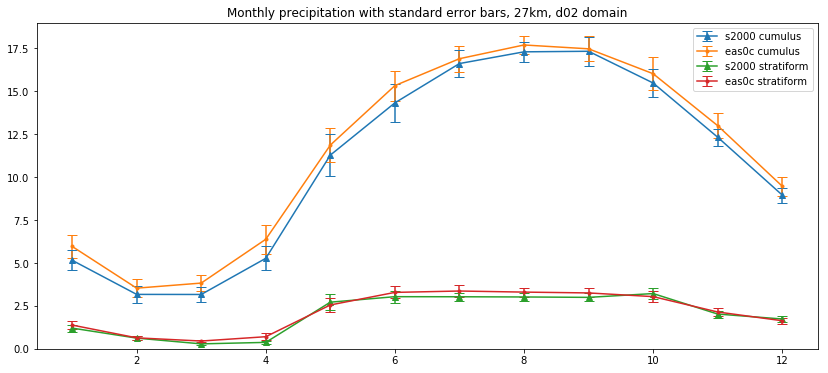

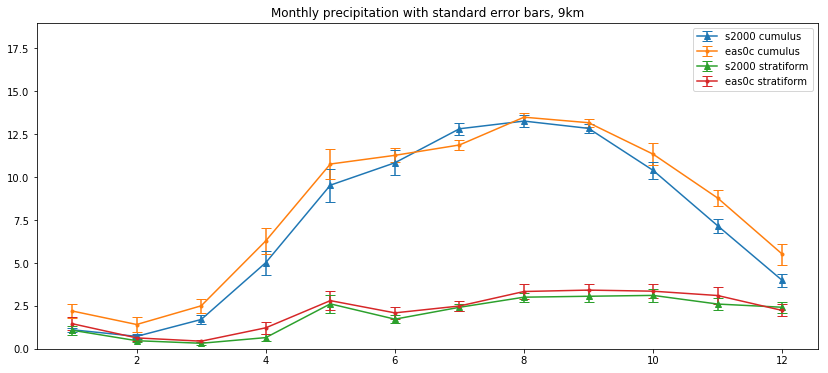

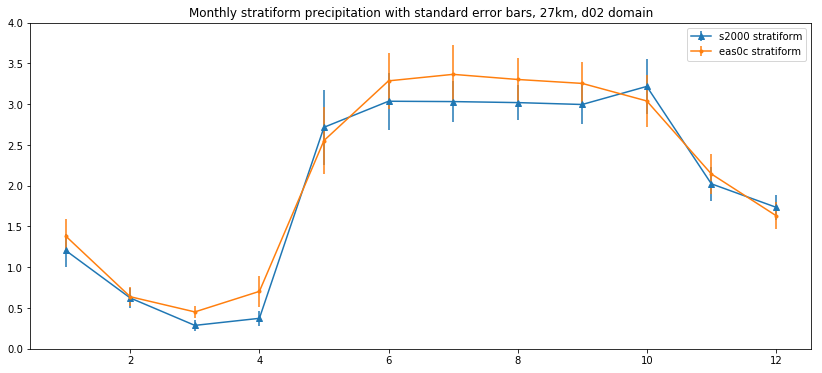

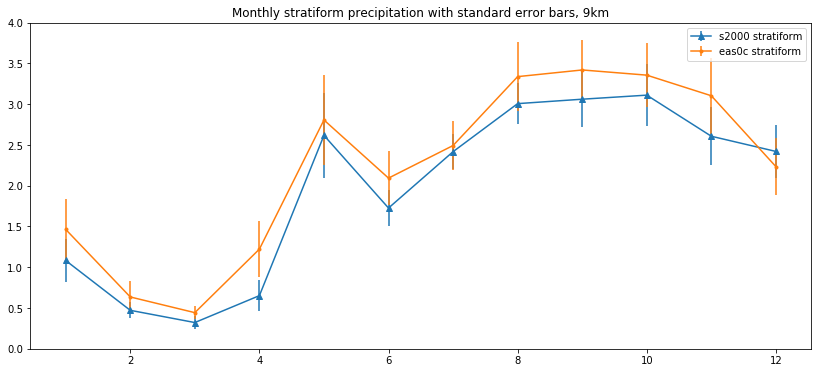

In [20]:
plt.rcParams["figure.figsize"] = 14,6
t=np.arange(1,13)

plt.figure(1)
plt.errorbar(t,s1_ann_d01_cu,s1_ann_d01_cu_sd, marker='^',capsize=5,label='s2000 cumulus')
plt.errorbar(t,s2_ann_d01_cu,s2_ann_d01_cu_sd, marker='.',capsize=5,label='eas0c cumulus')
plt.errorbar(t,s1_ann_d01_cl,s1_ann_d01_cl_sd, marker='^',capsize=5,label='s2000 stratiform')
plt.errorbar(t,s2_ann_d01_cl,s2_ann_d01_cl_sd, marker='.',capsize=5,label='eas0c stratiform')
plt.ylim(0,19)
plt.title('Monthly precipitation with standard error bars, 27km, d02 domain')
plt.legend()

plt.figure(2)
plt.errorbar(t,s1_ann_d02_cu,s1_ann_d02_cu_sd, marker='^',capsize=5,label='s2000 cumulus')
plt.errorbar(t,s2_ann_d02_cu,s2_ann_d02_cu_sd, marker='.',capsize=5,label='eas0c cumulus')
plt.errorbar(t,s1_ann_d02_cl,s1_ann_d02_cl_sd, marker='^',capsize=5,label='s2000 stratiform')
plt.errorbar(t,s2_ann_d02_cl,s2_ann_d02_cl_sd, marker='.',capsize=5,label='eas0c stratiform')
plt.ylim(0,19)
plt.title('Monthly precipitation with standard error bars, 9km')
plt.legend()

plt.figure(3)
plt.errorbar(t,s1_ann_d01_cl,s1_ann_d01_cl_sd, marker='^',label='s2000 stratiform')
plt.errorbar(t,s2_ann_d01_cl,s2_ann_d01_cl_sd, marker='.',label='eas0c stratiform')
plt.ylim(0,4)
plt.title('Monthly stratiform precipitation with standard error bars, 27km, d02 domain')
plt.legend()

plt.figure(4)
plt.errorbar(t,s1_ann_d02_cl,s1_ann_d02_cl_sd, marker='^',label='s2000 stratiform')
plt.errorbar(t,s2_ann_d02_cl,s2_ann_d02_cl_sd, marker='.',label='eas0c stratiform')
plt.ylim(0,4)
plt.title('Monthly stratiform precipitation with standard error bars, 9km')
plt.legend()

plt.show()

In [21]:
#resample to quarterly
# def qtr_sam(data):
#     time,lat,lon=np.shape(data)
#     myperm=list(range(2,180))
#     myperm.append(0)
#     myperm.append(1)
#     return np.mean(np.reshape(data.data[myperm,:,:],(-1,3,lat,lon)),axis=1)

s1_qtr_d01_cl=agg_qtr(s1_mth_d01_cl)
s1_qtr_d01_cu=agg_qtr(s1_mth_d01_cu)
s2_qtr_d01_cl=agg_qtr(s2_mth_d01_cl)
s2_qtr_d01_cu=agg_qtr(s2_mth_d01_cu)

s1_qtr_d02_cl=agg_qtr(s1_mth_d02_cl)
s1_qtr_d02_cu=agg_qtr(s1_mth_d02_cu)
s2_qtr_d02_cl=agg_qtr(s2_mth_d02_cl)
s2_qtr_d02_cu=agg_qtr(s2_mth_d02_cu)

print(np.shape(s1_mth_d01_cl))
#group data
def getmean(ppt_data):
    return np.mean(ppt_data,axis=(0,2,3))
s1_qtrr_d01_cl=getmean(s1_qtr_d01_cl)
s1_qtrr_d01_cu=getmean(s1_qtr_d01_cu)
s2_qtrr_d01_cl=getmean(s2_qtr_d01_cl)
s2_qtrr_d01_cu=getmean(s2_qtr_d01_cu)

s1_qtrr_d02_cl=getmean(s1_qtr_d02_cl)
s1_qtrr_d02_cu=getmean(s1_qtr_d02_cu)
s2_qtrr_d02_cl=getmean(s2_qtr_d02_cl)
s2_qtrr_d02_cu=getmean(s2_qtr_d02_cu)

print('hihi',np.shape(s1_qtr_d01_cu))
def calculate_qsem_d01(ppt_data):
#     ti,lat,lon=np.shape(ppt_data)
    return sem(np.mean(ppt_data,axis=(2,3)),axis=0)

s1_qtr_d01_cu_sd=calculate_qsem_d01(s1_qtr_d01_cu)
s1_qtr_d01_cl_sd=calculate_qsem_d01(s1_qtr_d01_cl)
s2_qtr_d01_cu_sd=calculate_qsem_d01(s2_qtr_d01_cu)
s2_qtr_d01_cl_sd=calculate_qsem_d01(s2_qtr_d01_cl)

s1_qtr_d02_cu_sd=calculate_qsem_d01(s1_qtr_d02_cu)
s1_qtr_d02_cl_sd=calculate_qsem_d01(s1_qtr_d02_cl)
s2_qtr_d02_cu_sd=calculate_qsem_d01(s2_qtr_d02_cu)
s2_qtr_d02_cl_sd=calculate_qsem_d01(s2_qtr_d02_cl)

print(np.shape(s2_qtr_d02_cl_sd))
print(np.shape(s2_qtrr_d02_cu))

(180, 89, 170)
hihi (15, 4, 89, 170)
(4,)
(4,)


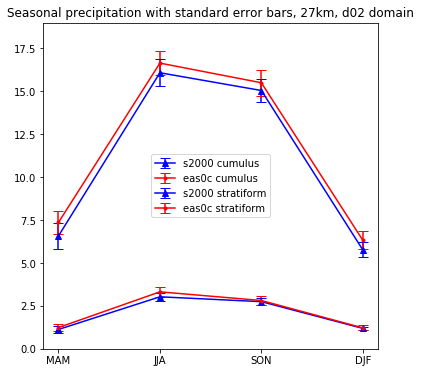

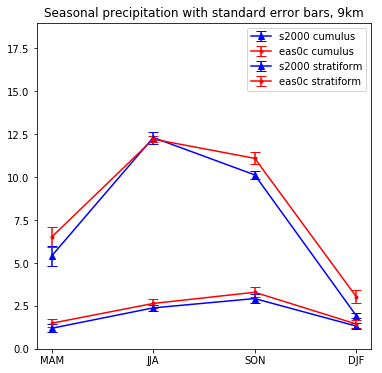

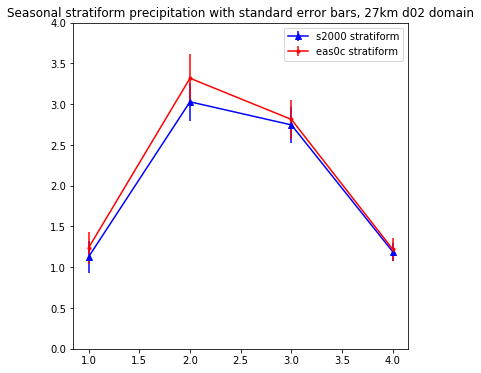

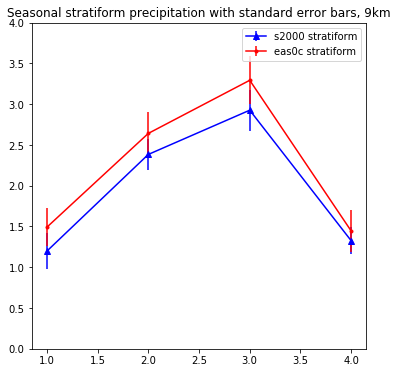

In [22]:
t=np.arange(1,5)
plt.rcParams["figure.figsize"] = 6,6
plt.figure(1)
plt.errorbar(t,s1_qtrr_d01_cu,s1_qtr_d01_cu_sd, marker='^',capsize=5,color='b',label='s2000 cumulus')
plt.errorbar(t,s2_qtrr_d01_cu,s2_qtr_d01_cu_sd, marker='.',capsize=5,color='r',label='eas0c cumulus')
plt.errorbar(t,s1_qtrr_d01_cl,s1_qtr_d01_cl_sd, marker='^',capsize=5,color='b',label='s2000 stratiform')
plt.errorbar(t,s2_qtrr_d01_cl,s2_qtr_d01_cl_sd, marker='.',capsize=5,color='r',label='eas0c stratiform')
plt.ylim(0,19)
my_xticks=['MAM','JJA','SON','DJF']
plt.xticks([1,2,3,4],my_xticks)
plt.title('Seasonal precipitation with standard error bars, 27km, d02 domain')
plt.legend()

plt.figure(2)
plt.errorbar(t,s1_qtrr_d02_cu,s1_qtr_d02_cu_sd, marker='^',capsize=5,color='b',label='s2000 cumulus')
plt.errorbar(t,s2_qtrr_d02_cu,s2_qtr_d02_cu_sd, marker='.',capsize=5,color='r',label='eas0c cumulus')
plt.errorbar(t,s1_qtrr_d02_cl,s1_qtr_d02_cl_sd, marker='^',capsize=5,color='b',label='s2000 stratiform')
plt.errorbar(t,s2_qtrr_d02_cl,s2_qtr_d02_cl_sd, marker='.',capsize=5,color='r',label='eas0c stratiform')
plt.ylim(0,19)
my_xticks=['MAM','JJA','SON','DJF']
plt.xticks([1,2,3,4],my_xticks)
plt.title('Seasonal precipitation with standard error bars, 9km')
plt.legend()

plt.figure(3)
plt.errorbar(t,s1_qtrr_d01_cl,s1_qtr_d01_cl_sd, marker='^',color='b',label='s2000 stratiform')
plt.errorbar(t,s2_qtrr_d01_cl,s2_qtr_d01_cl_sd, marker='.',color='r',label='eas0c stratiform')
plt.ylim(0,4)
plt.title('Seasonal stratiform precipitation with standard error bars, 27km d02 domain')
plt.legend()

plt.figure(4)
plt.errorbar(t,s1_qtrr_d02_cl,s1_qtr_d02_cl_sd, marker='^',color='b',label='s2000 stratiform')
plt.errorbar(t,s2_qtrr_d02_cl,s2_qtr_d02_cl_sd, marker='.',color='r',label='eas0c stratiform')
plt.ylim(0,4)
plt.title('Seasonal stratiform precipitation with standard error bars, 9km')
plt.legend()

plt.show()

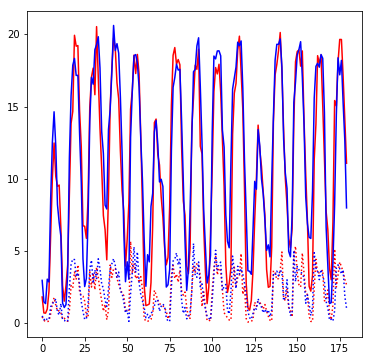

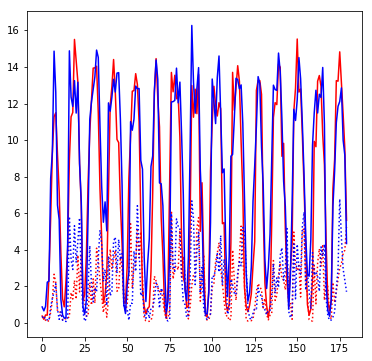

In [23]:
plt.figure(1)
plt.plot(np.mean(s1_mth_d01_cu,axis=(1,2)),'r-')
plt.plot(np.mean(s1_mth_d01_cl,axis=(1,2)),'r:')
plt.plot(np.mean(s2_mth_d01_cu,axis=(1,2)),'b-')
plt.plot(np.mean(s2_mth_d01_cl,axis=(1,2)),'b:')
plt.show()

plt.figure(2)
plt.plot(np.mean(s1_mth_d02_cu,axis=(1,2)),'r-')
plt.plot(np.mean(s1_mth_d02_cl,axis=(1,2)),'r:')
plt.plot(np.mean(s2_mth_d02_cu,axis=(1,2)),'b-')
plt.plot(np.mean(s2_mth_d02_cl,axis=(1,2)),'b:')
plt.show()

(12, 11, 17)
(12, 11)
(12, 11)
(12, 11)
(12, 11)
(12, 11)
(12, 11)
(12, 11)
(12, 11)
(12, 11)


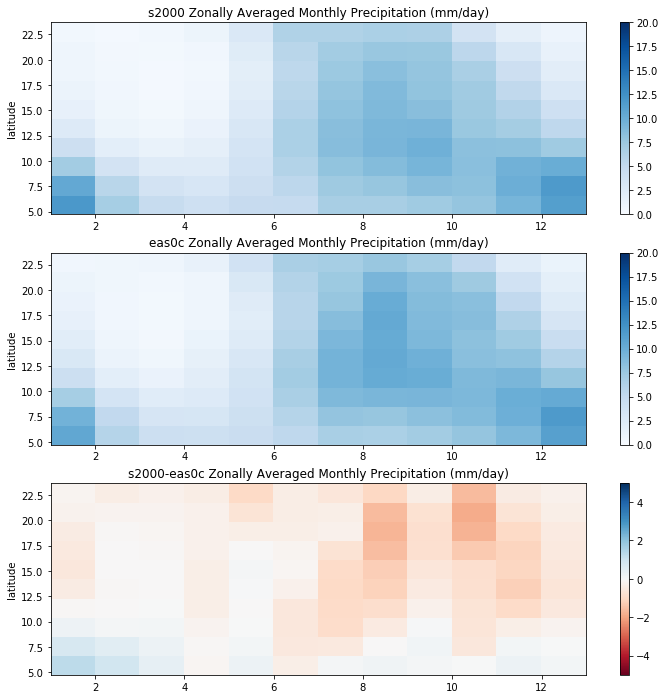

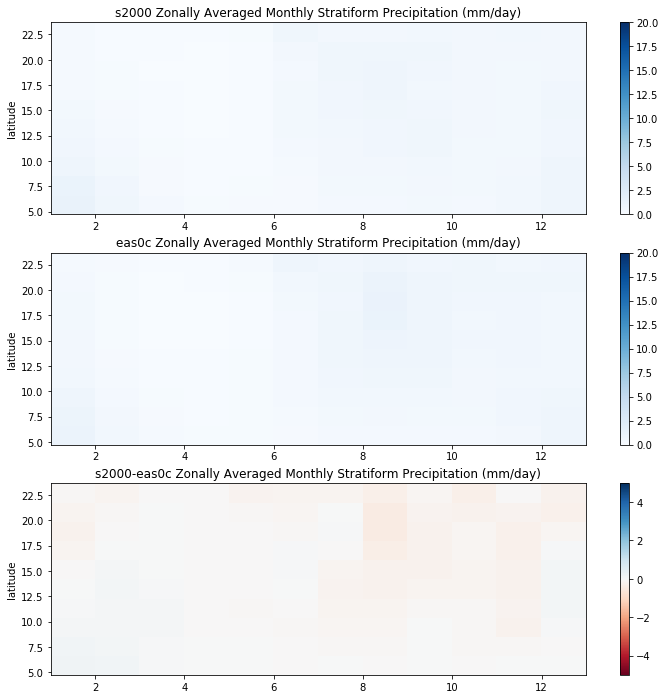

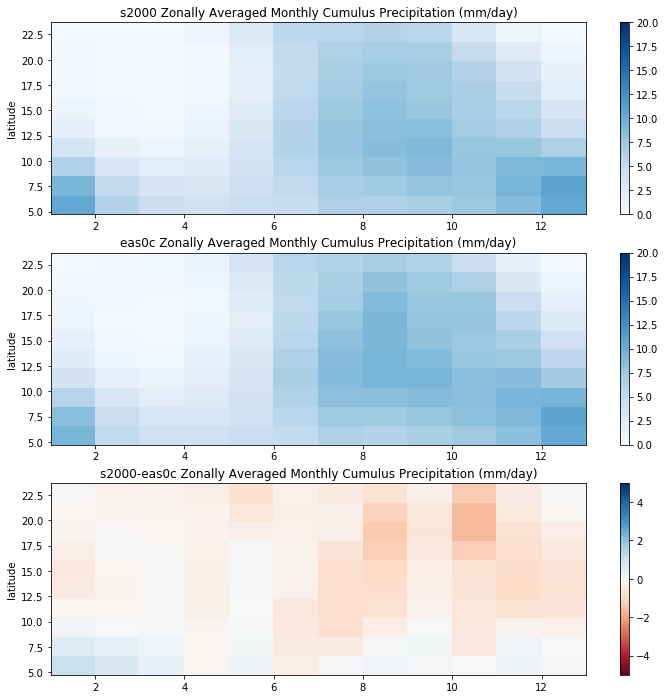

In [24]:

# cesmcl2000 = reshape_time(pptcl2k.PRECL)*units
# cesmcu2000 = reshape_time(pptcu2k.PRECC)*units
# cesmcleas0c = reshape_time(pptcleas0.PRECL)*units
# cesmcueas0c = reshape_time(pptcueas0.PRECC)*units

np.shape(cesmcl2000)
cesmcl2000_mth=cesmcl2000.groupby('time.month').mean(axis=0)
cesmcu2000_mth=cesmcu2000.groupby('time.month').mean(axis=0)
cesmcleas0c_mth=cesmcleas0c.groupby('time.month').mean(axis=0)
cesmcueas0c_mth=cesmcueas0c.groupby('time.month').mean(axis=0)
ppt2000_mth=cesmcl2000_mth+cesmcu2000_mth
ppteas0c_mth=cesmcleas0c_mth+cesmcueas0c_mth
print(np.shape(ppt2000_mth))

plt.rcParams["figure.figsize"] = 12,12
lats_mth=np.mean(ppt2000_mth,axis=2)
print(np.shape(lats_mth))
plt.figure(1)
plt.subplot(3,1,1)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=20,cmap='Blues')
plt.ylabel('latitude')
plt.title('s2000 Zonally Averaged Monthly Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(ppteas0c_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,2)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=20,cmap='Blues')
plt.ylabel('latitude')
plt.title('eas0c Zonally Averaged Monthly Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(ppt2000_mth-ppteas0c_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,3)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=-5,vmax=5,cmap='RdBu')
plt.ylabel('latitude')
plt.title('s2000-eas0c Zonally Averaged Monthly Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(cesmcl2000_mth,axis=2)
print(np.shape(lats_mth))
plt.figure(2)
plt.subplot(3,1,1)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=20,cmap='Blues')
plt.ylabel('latitude')
plt.title('s2000 Zonally Averaged Monthly Stratiform Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(cesmcleas0c_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,2)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=20,cmap='Blues')
plt.ylabel('latitude')
plt.title('eas0c Zonally Averaged Monthly Stratiform Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()


lats_mth=np.mean(cesmcl2000_mth-cesmcleas0c_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,3)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=-5,vmax=5,cmap='RdBu')
plt.ylabel('latitude')
plt.title('s2000-eas0c Zonally Averaged Monthly Stratiform Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(cesmcu2000_mth,axis=2)
print(np.shape(lats_mth))
plt.figure(3)
plt.subplot(3,1,1)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=20,cmap='Blues')
plt.ylabel('latitude')
plt.title('s2000 Zonally Averaged Monthly Cumulus Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

lats_mth=np.mean(cesmcueas0c_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,2)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=0,vmax=20,cmap='Blues')
plt.ylabel('latitude')
plt.title('eas0c Zonally Averaged Monthly Cumulus Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()


lats_mth=np.mean(cesmcu2000_mth-cesmcueas0c_mth,axis=2)
print(np.shape(lats_mth))
plt.subplot(3,1,3)
plt.pcolormesh(np.arange(1,14),lats.data,lats_mth.T,vmin=-5,vmax=5,cmap='RdBu')
plt.ylabel('latitude')
plt.title('s2000-eas0c Zonally Averaged Monthly Cumulus Precipitation (mm/day)')
# plt.xticks(time_val2,my_xticks)
plt.colorbar()

plt.show()

## PDF plots ##

In [25]:
from scipy.stats import norm
import scipy
import matplotlib.mlab as mlab
print(np.shape(s1raw_d01.PPT))
plt.rcParams["figure.figsize"] = 10,6

def plot_pdf(x,label,ax,clr='k'):
    num_bins = 100
#     the histogram of the data
#     n, bins, patches = ax.hist(x, num_bins, normed=1)
#     add a 'best fit' line
    kde=scipy.stats.gaussian_kde(x.data)
    t_range = np.linspace(min(x.data),max(x.data),num_bins)
    ax.plot(t_range,kde(t_range),clr,label=label)
    ax.legend()

print(np.shape(s2_mth_d01_ppt))

(5475, 89, 170)
(180, 89, 170)


### Plot PDF for whole year

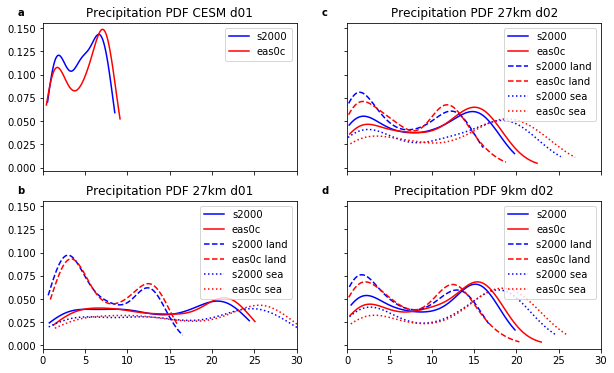

In [45]:
plt.figure(1)
fig, ax = plt.subplots(2,2,sharex=True,sharey=True)
ax[0,0].set_title('Precipitation PDF CESM d01')
plot_pdf(np.mean(cesmcu2000,axis=(1,2)),'s2000',ax[0,0],'b')
plot_pdf(np.mean(cesmcueas0c,axis=(1,2)),'eas0c',ax[0,0],'r')
plt.xlim( (0, 30) )
ax[0,0].text(-0.1, 1.05, 'a', transform=ax[0,0].transAxes, 
            size=10, weight='bold')
# plt.legend()

# plt.figure(2)
# fig, ax = plt.subplots(3,1,2)
#make landmask and seamask
# for some reason the index 0 and 2 of the timestep is messed up.
# I may have edited it by accident.
landmask_d01=s1raw_d01.LANDMASK[1,:,:].data
landmask_d01[landmask_d01==0]=np.nan
seamask_d01=(-1*(np.nan_to_num(s1raw_d01.LANDMASK[4,:,:].data)-1))
seamask_d01[seamask_d01==0]=np.nan

ax[1,0].set_title('Precipitation PDF 27km d01')
x=np.mean(s1_mth_d01_ppt,axis=(1,2))
# x=s1_mth_d01_ppt.data.flatten()
plot_pdf(x,'s2000',ax[1,0],'b')
x2=np.mean(s2_mth_d01_ppt,axis=(1,2))
# x2=s2_mth_d01_ppt.data.flatten()
plot_pdf(x2,'eas0c',ax[1,0],'r')
x3=np.nanmean(s1_mth_d01_ppt*landmask_d01,axis=(1,2))
# x3=(s1_mth_d01_ppt*landmask_d01).data.flatten()
# x3= x3[~np.isnan(x3)]
plot_pdf(x3,'s2000 land',ax[1,0],'b--')
x4=np.nanmean(s2_mth_d01_ppt*landmask_d01,axis=(1,2))
# x4=(s2_mth_d01_ppt*landmask_d01).data.flatten()
# x4= x4[~np.isnan(x4)]
plot_pdf(x4,'eas0c land',ax[1,0],'r--')
x5=np.nanmean(s1_mth_d01_ppt*seamask_d01,axis=(1,2))
# x5=(s1_mth_d01_ppt*seamask_d01).data.flatten()
# x5= x5[~np.isnan(x5)]
plot_pdf(x5,'s2000 sea',ax[1,0],'b:')
x6=np.nanmean(s2_mth_d01_ppt*seamask_d01,axis=(1,2))
# x6=(s2_mth_d01_ppt*seamask_d01).data.flatten()
# x6= x6[~np.isnan(x6)]
plot_pdf(x6,'eas0c sea',ax[1,0],'r:')
ax[1,0].text(-0.1, 1.05, 'b', transform=ax[1,0].transAxes, 
            size=10, weight='bold')


#d02
latmin=6.74
latmax=20.40
lonmin=95.74
lonmax=110.08
#make landmask and seamask
landmask_d012=s1raw_d01.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax)).LANDMASK[1,:,:].data
landmask_d012[landmask_d012==0]=np.nan
seamask_d012=(-1*(np.nan_to_num(s1raw_d01.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax)).LANDMASK[3,:,:].data)-1))
seamask_d012[seamask_d012==0]=np.nan

ax[0,1].set_title('Precipitation PDF 27km d02')
x=np.mean(s1_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax)),axis=(1,2))
plot_pdf(x,'s2000',ax[0,1],'b')
x2=np.mean(s2_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax)),axis=(1,2))
plot_pdf(x2,'eas0c',ax[0,1],'r')
x3=np.nanmean(s1_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))*landmask_d012,axis=(1,2))
plot_pdf(x3,'s2000 land',ax[0,1],'b--')
x4=np.nanmean(s2_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))*landmask_d012,axis=(1,2))
plot_pdf(x4,'eas0c land',ax[0,1],'r--')
x5=np.nanmean(s1_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))*seamask_d012,axis=(1,2))
plot_pdf(x5,'s2000 sea',ax[0,1],'b:')
x6=np.nanmean(s2_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))*seamask_d012,axis=(1,2))
plot_pdf(x6,'eas0c sea',ax[0,1],'r:')
ax[0,1].text(-0.1, 1.05, 'c', transform=ax[0,1].transAxes, 
            size=10, weight='bold')

#make landmask and seamask
landmask_d02=s1raw_d02.LANDMASK[1,:,:].data
landmask_d02[landmask_d02==0]=np.nan
seamask_d02=(-1*(np.nan_to_num(s1raw_d02.LANDMASK[3,:,:].data)-1))
seamask_d02[seamask_d02==0]=np.nan

ax[1,1].set_title('Precipitation PDF 9km d02')
x=np.mean(s1_mth_d02_ppt,axis=(1,2))
plot_pdf(x,'s2000',ax[1,1],'b')
x2=np.mean(s2_mth_d02_ppt,axis=(1,2))
plot_pdf(x2,'eas0c',ax[1,1],'r')
x3=np.nanmean(s1_mth_d02_ppt*landmask_d02,axis=(1,2))
plot_pdf(x3,'s2000 land',ax[1,1],'b--')
x4=np.nanmean(s2_mth_d02_ppt*landmask_d02,axis=(1,2))
plot_pdf(x4,'eas0c land',ax[1,1],'r--')
x5=np.nanmean(s1_mth_d02_ppt*seamask_d02,axis=(1,2))
plot_pdf(x5,'s2000 sea',ax[1,1],'b:')
x6=np.nanmean(s2_mth_d02_ppt*seamask_d02,axis=(1,2))
plot_pdf(x6,'eas0c sea',ax[1,1],'r:')
ax[1,1].text(-0.1, 1.05, 'd', transform=ax[1,1].transAxes, 
            size=10, weight='bold')

plt.show()

In [40]:
# (-1*(s1raw_d01.LANDMASK[0,:,:].data-1))
np.nan_to_num(s1raw_d01.LANDMASK[-1,:,:].data)

array([[ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,

### Plot PDF for seasonal

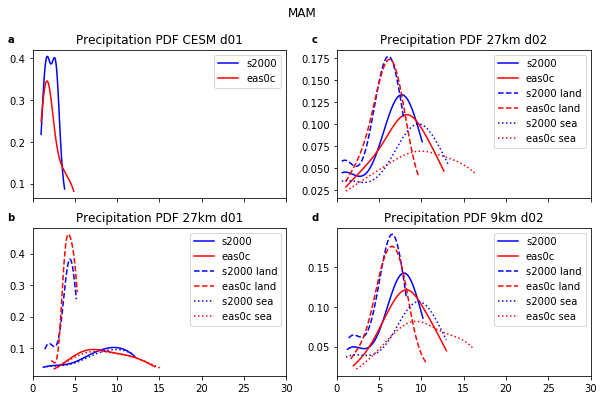

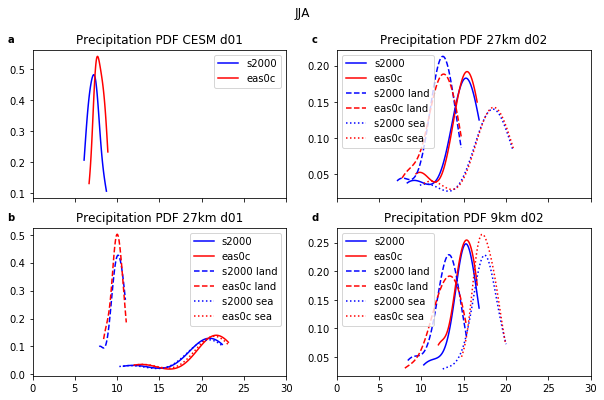

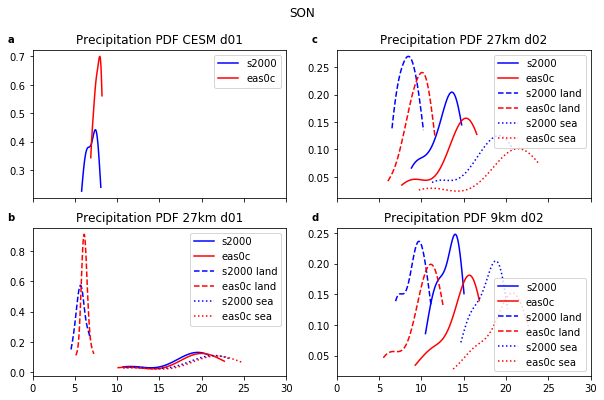

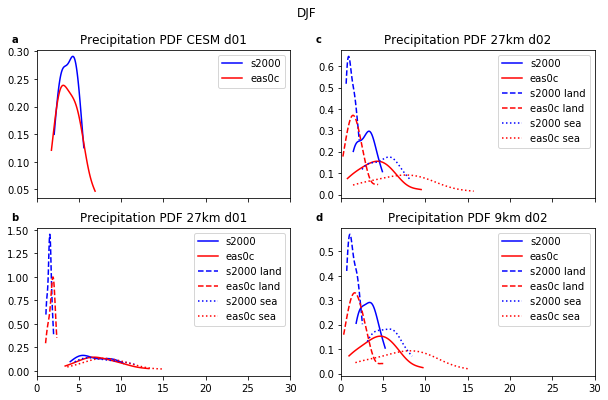

In [46]:
def agg_qtr_raw(ppt_data):
    ti,lat,lon=np.shape(ppt_data)
    qtr_data=np.mean(qtr_sam(ppt_data),axis=1)
    return np.reshape(qtr_data,(-1,4,lat,lon))

def plt_qtr_pdf(qtr):
    fig, ax = plt.subplots(2,2,sharex=True)
    ax[0,0].set_title('Precipitation PDF CESM d01')
    plot_pdf(np.mean(s1_qtr[:,qtr,:,:],axis=(1,2)),'s2000',ax[0,0],'b')
    plot_pdf(np.mean(s2_qtr[:,qtr,:,:],axis=(1,2)),'eas0c',ax[0,0],'r')
    plt.xlim( (0, 30) )
    ax[0,0].text(-0.1, 1.05, 'a', transform=ax[0,0].transAxes, 
                size=10, weight='bold')

    ax[1,0].set_title('Precipitation PDF 27km d01')
    x=np.mean(agg_qtr_raw(s1_mth_d01_ppt)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x,'s2000',ax[1,0],'b')
    x2=np.mean(agg_qtr_raw(s2_mth_d01_ppt)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x2,'eas0c',ax[1,0],'r')
    x3=np.nanmean(agg_qtr_raw(s1_mth_d01_cu*landmask_d01)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x3,'s2000 land',ax[1,0],'b--')
    x4=np.nanmean(agg_qtr_raw(s2_mth_d01_cu*landmask_d01)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x4,'eas0c land',ax[1,0],'r--')
    x5=np.nanmean(agg_qtr_raw(s1_mth_d01_cu*seamask_d01)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x5,'s2000 sea',ax[1,0],'b:')
    x6=np.nanmean(agg_qtr_raw(s2_mth_d01_cu*seamask_d01)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x6,'eas0c sea',ax[1,0],'r:')
    ax[1,0].text(-0.1, 1.05, 'b', transform=ax[1,0].transAxes, 
                size=10, weight='bold')

    ax[0,1].set_title('Precipitation PDF 27km d02')
    x=np.mean(agg_qtr_raw(s1_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax)))[:,qtr,:,:],axis=(1,2))
    plot_pdf(x,'s2000',ax[0,1],'b')
    x2=np.mean(agg_qtr_raw(s2_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax)))[:,qtr,:,:],axis=(1,2))
    plot_pdf(x2,'eas0c',ax[0,1],'r')
    x3=np.nanmean(agg_qtr_raw(s1_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))*landmask_d012)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x3,'s2000 land',ax[0,1],'b--')
    x4=np.nanmean(agg_qtr_raw(s2_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))*landmask_d012)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x4,'eas0c land',ax[0,1],'r--')
    x5=np.nanmean(agg_qtr_raw(s1_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))*seamask_d012)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x5,'s2000 sea',ax[0,1],'b:')
    x6=np.nanmean(agg_qtr_raw(s2_mth_d01_ppt.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))*seamask_d012)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x6,'eas0c sea',ax[0,1],'r:')
    ax[0,1].text(-0.1, 1.05, 'c', transform=ax[0,1].transAxes, 
                size=10, weight='bold')

    ax[1,1].set_title('Precipitation PDF 9km d02')
    plot_pdf(np.mean(agg_qtr_raw(s1_mth_d02_ppt)[:,qtr,:,:],axis=(1,2)),'s2000',ax[1,1],'b')
    plot_pdf(np.mean(agg_qtr_raw(s2_mth_d02_ppt)[:,qtr,:,:],axis=(1,2)),'eas0c',ax[1,1],'r')
    x3=np.nanmean(agg_qtr_raw(s1_mth_d02_ppt*landmask_d02)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x3,'s2000 land',ax[1,1],'b--')
    x4=np.nanmean(agg_qtr_raw(s2_mth_d02_ppt*landmask_d02)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x4,'eas0c land',ax[1,1],'r--')
    x5=np.nanmean(agg_qtr_raw(s1_mth_d02_ppt*seamask_d02)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x5,'s2000 sea',ax[1,1],'b:')
    x6=np.nanmean(agg_qtr_raw(s2_mth_d02_ppt*seamask_d02)[:,qtr,:,:],axis=(1,2))
    plot_pdf(x6,'eas0c sea',ax[1,1],'r:')
    ax[1,1].text(-0.1, 1.05, 'd', transform=ax[1,1].transAxes, 
                size=10, weight='bold')


for i in range(1,5):
    plt.figure(i)
    plt_qtr_pdf(i-1)
    plt.suptitle(quarters[i])

    
plt.show()

In [623]:
np.shape(agg_qtr_raw(s2_mth_d01_ppt))

(15, 4, 89, 170)

### PDFs using daily data, individual grids

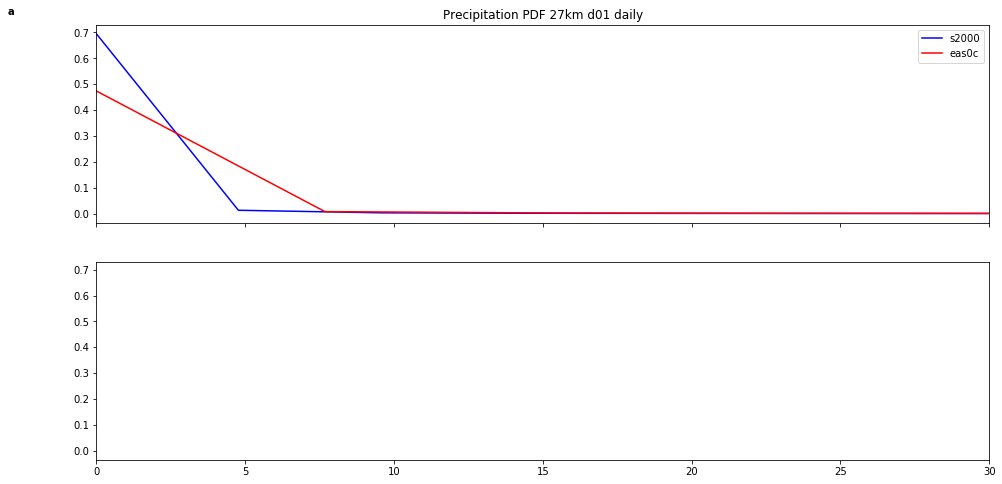

In [605]:
def plot_daily_pdf(x,label,ax,clr='k'):
    num_bins = 100
#     the histogram of the data
#     n, bins, patches = ax.hist(x, num_bins, normed=1)
#     add a 'best fit' line
    kde=scipy.stats.gaussian_kde(x)
    t_range = np.linspace(min(x),max(x),num_bins)
    ax.plot(t_range,kde(t_range),clr,label=label)
    ax.legend()

type(np.array(s1raw_d01))
fig, ax = plt.subplots(2,1,sharex=True,sharey=True)
ax[0].set_title('Precipitation PDF 27km d01 daily')
plot_daily_pdf(s1raw_d01.PPT.data.flatten()[:1000000],'s2000',ax[0],'b')
plot_daily_pdf(s2raw_d01.PPT.data.flatten()[:1000000],'eas0c',ax[0],'r')
plt.xlim( (0, 30) )
ax[0].text(-0.1, 1.05, 'a', transform=ax[0].transAxes, 
            size=10, weight='bold')
plt.show()


In [602]:
np.shape(s1raw_d01.PPT.data.flatten())

(82836750,)

<xarray.Dataset>
Dimensions:  (lat: 400, lon: 1440, time: 234)
Coordinates:
  * time     (time) int32 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 ...
  * lat      (lat) float32 -49.875 -49.625 -49.375 -49.125 -48.875 -48.625 ...
  * lon      (lon) float32 -179.875 -179.625 -179.375 -179.125 -178.875 ...
Data variables:
    PPT      (time, lat, lon) float64 0.5119 0.5777 0.4229 0.3213 0.419 ...
Attributes:
    title:    monthly averaged precipitation combined microwave-IR with gauge...
(234, 400, 1440)
(228, 85, 169)


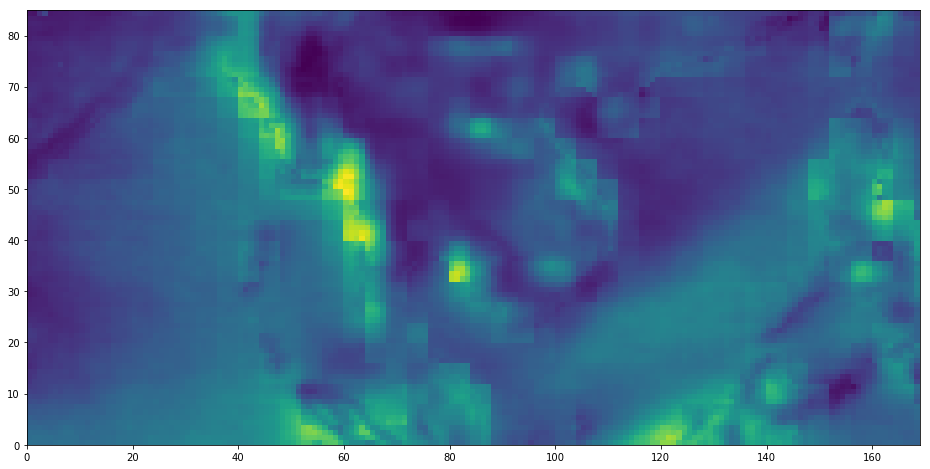

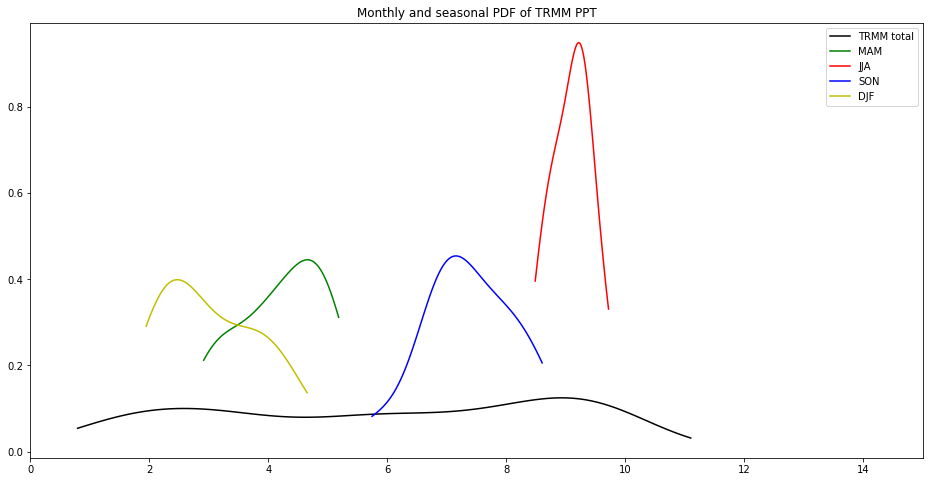

In [616]:
# trmm pdf
trmm=xr.open_dataset('../ppt_data/trmm_monthly.nc',decode_times=False)
print(trmm)
ti,nlat,nlon=trmm.PPT.shape
print(trmm.PPT.shape)
trmmmth=trmm.PPT[:228,:,:]

# trmmyr=np.mean(trmmmth,axis=0)
trmm_xr=xr.DataArray(trmmmth,dims=('mth','lat','lon'),coords={'mth':np.arange(1,229),'lat':trmm.lat,'lon':trmm.lon})
np.shape(trmm_xr)
#d01
latmin=2.92
latmax=24.18
lonmin=81.9 #80.66
lonmax=124.17 #125.42
trmmmth_cut=trmm_xr.sel(lat=slice(latmin, latmax),lon=slice(lonmin,lonmax))
print(np.shape(trmmmth_cut))
plt.figure(1)
plt.pcolormesh(np.mean(trmmmth_cut,axis=0))


plt.figure(2)
ax=plt.gca()
# fig, ax = plt.subplots(2,2,sharex=True,sharey=True)
# ax[0,0].set_title('Precipitation PDF TRMM d01')
plot_pdf(np.mean(trmmmth_cut,axis=(1,2)),'TRMM total',ax,'k')
# plot_pdf(np.mean(trmmmth_cut,axis=(1,2)),'eas0c',ax[0,0],'r')
plt.xlim( (0, 15) )
# ax[0,0].text(-0.1, 1.05, 'a', transform=ax[0,0].transAxes, 
#             size=10, weight='bold')
trmm_qtr=agg_qtr_raw(trmmmth_cut)
colors=['g','r','b','y']
for i in range(1,5):
    plot_pdf(np.mean(trmm_qtr[:,i-1,:,:],axis=(1,2)),quarters[i],ax,colors[i-1])
    plt.title('Monthly and seasonal PDF of TRMM PPT')

plt.show()

## Analysis of cesm driving SST


mean of s1 is 299.8267K, sd is 3.7222.
mean of s2 is 300.2026K, sd is 3.6288.
diff is 0.3764
new lim  0.018449197860962566 (180, 11, 17) (180, 11, 17)


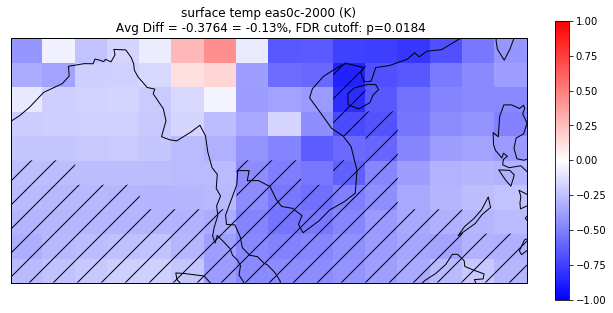

In [533]:
print('mean of s1 is {:.4f}K, sd is {:.4f}.'.format(float(np.mean(cesm_ts_2000)),float(np.std(cesm_ts_2000))))
print('mean of s2 is {:.4f}K, sd is {:.4f}.'.format(float(np.mean(cesm_ts_eas0c)),float(np.std(cesm_ts_eas0c))))
print('diff is {:.4f}'.format(float(np.mean(cesm_ts_eas0c-cesm_ts_2000))))
plt.figure(1)
ax=plt.subplot(projection=ccrs.PlateCarree())
title='surface temp eas0c-2000 (K)'
plt_diff(cesm_ts_2000,cesm_ts_eas0c,title,ax,flip=True)
plt.show()

(15, 4, 11, 17)
0.0024064171122994654
0.008556149732620321
0.019518716577540108
0.013903743315508022


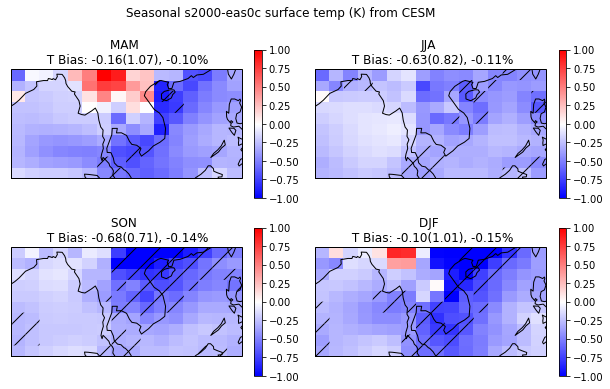

In [570]:
cmap = plt.get_cmap('bwr')
vminn=-1
vmaxx=1
scale=50
sm = plt.cm.ScalarMappable(cmap=cmap,norm=matplotlib.colors.Normalize(vmin=vminn, vmax=vmaxx))
sm._A = []
def draw_title(tt):
    return str('{} \n T Bias: {:.2f}({:.2f}), {:.2f}%'.format(quarters[tt+1],np.nanmean(pptdiff[:,tt,:,:]),\
            np.std(cesm_ts_diff_qtr[:,tt,:,:]), (np.nanmean(cesm_ts_diff_qtr[:,tt,:,:])/np.nanmean(cesm_ts_2000_qtr[:,tt,:,:])*100), \
                                                                       ))
def draw_qtr_plt_ts(ax,tt):
    ax.pcolormesh(pptcl2k.lon, pptcl2k.lat,np.mean(cesm_ts_diff_qtr[:,tt,:,:],axis=0),vmin=vminn,vmax=vmaxx,cmap=cmap)
    ax.pcolor(pptcl2k.lon, pptcl2k.lat, new_msk(cesm_ts_2000_qtr[:,tt,:,:],cesm_ts_eas0c_qtr[:,tt,:,:]), hatch='/', alpha=0.)
    ax.coastlines()
    plt.colorbar(sm,ax=ax,fraction=0.04, pad=0.05)
    ax.set_title(draw_title(tt))

cesm_ts_2000_qtr=agg_qtr(cesm_ts_2000)
cesm_ts_eas0c_qtr=agg_qtr(cesm_ts_eas0c)
cesm_ts_diff_qtr=cesm_ts_2000_qtr-cesm_ts_eas0c_qtr
print(np.shape(cesm_ts_2000_qtr))
plt.figure(1)
ax1=plt.subplot(2,2,1,projection=ccrs.PlateCarree())
draw_qtr_plt_ts(ax1,0)
ax2=plt.subplot(2,2,2,projection=ccrs.PlateCarree())
draw_qtr_plt_ts(ax2,1)
ax3=plt.subplot(2,2,3,projection=ccrs.PlateCarree())
draw_qtr_plt_ts(ax3,2)
ax4=plt.subplot(2,2,4,projection=ccrs.PlateCarree())
draw_qtr_plt_ts(ax4,3)
plt.suptitle('Seasonal s2000-eas0c surface temp (K) from CESM')
plt.show()

In [283]:
1000/3+1000/3-2000/3

0.0

In [502]:
aaa=np.arange(0,180)
aaa

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179])

In [509]:
bb=aaa.reshape(-1,3)
np.shape(bb)

(60, 3)